In [1]:
import pandas as pd
import numpy as np
import scipy
import math
import seaborn as sns
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
%matplotlib inline

In [2]:
#wczytanie i zlaczenie plikow
allFiles = ['dane.csv', 'dane2.csv', 'dane3.csv']
data = []
for f in allFiles:
    df = pd.read_csv(f, sep=';')
    data.append(df)
frame = pd.merge(data[0], data[1], on='Data')
frame = pd.merge(frame, data[2], on='Data')

In [3]:
frame[0:5]

Data  poziom wody w piezometrze B1 npm [cm]  \
0  2008-09-23                                  67.21   
1  2008-09-24                                  66.29   
2  2008-09-25                                  65.21   
3  2008-09-26                                  64.33   
4  2008-09-27                                  63.40   

   temperatura wody w piezometrze B1 [C]  poziom morza  \
0                                  12.57        493.50   
1                                  12.56        490.67   
2                                  12.54        486.67   
3                                  12.53        481.00   
4                                  12.51        480.67   

   poziom morza  [cm] npm  Opady  Temperatura powietrza [C]  Prędkość wiatru  \
0                  -14.50    0.0                      12.13             3.88   
1                  -17.33    0.0                      10.86             4.50   
2                  -21.33    0.0                      10.05             2.63   
3                  -27.00    0.0                       9.54             1.88   
4                  -27.33    0.0                      13.00             6.63   

   Kierunek wiatru  Unnamed: 5  Unnamed: 6 kierunki wiatru  zakres kąta  
0            66.25         NaN         NaN               N       0<22,5  
1            53.75         NaN         NaN              NE    22,5-67,5  
2            30.00         NaN         NaN               E   67,5-112,5  
3           212.50         NaN         NaN              SE  112,5-157,5  
4           242.50         NaN         NaN               S  157,5-202,5

In [4]:
#zmiana nazw kolumn
columns = { 'Data' : 'date', 'poziom wody w piezometrze B1 npm [cm]': 'waterlv',
            'temperatura wody w piezometrze B1 [C]': 'watertemp',
            'poziom morza': 'sealv',
            'Opady' : 'precip', 'Temperatura powietrza [C]': 'temp',
            'Prędkość wiatru' : 'vwind', 'Kierunek wiatru' : 'dwind' }
frame = frame[list(columns.keys())].rename(columns=columns)

In [5]:
frame[0:3]

date  waterlv  watertemp   sealv  precip   temp  vwind  dwind
0  2008-09-23    67.21      12.57  493.50     0.0  12.13   3.88  66.25
1  2008-09-24    66.29      12.56  490.67     0.0  10.86   4.50  53.75
2  2008-09-25    65.21      12.54  486.67     0.0  10.05   2.63  30.00

In [6]:
frame.shape

(2139, 8)

In [7]:
frame.describe

<bound method NDFrame.describe of             date  waterlv  watertemp   sealv  precip   temp  vwind   dwind
0     2008-09-23    67.21      12.57  493.50    0.00  12.13   3.88   66.25
1     2008-09-24    66.29      12.56  490.67    0.00  10.86   4.50   53.75
2     2008-09-25    65.21      12.54  486.67    0.00  10.05   2.63   30.00
3     2008-09-26    64.33      12.53  481.00    0.00   9.54   1.88  212.50
4     2008-09-27    63.40      12.51  480.67    0.00  13.00   6.63  242.50
5     2008-09-28    62.59      12.49  479.33    0.90  13.15   7.75  255.00
6     2008-09-29    61.62      12.47  493.00    5.70  10.96   6.13  240.00
7     2008-09-30    61.48      12.44  492.00    2.40  10.29   6.13  207.50
8     2008-10-01    61.23      12.42  493.50    9.60  11.06   9.25  213.75
9     2008-10-02    61.33      12.40  497.83    0.00  10.30  11.38  220.00
10    2008-10-03    63.72      12.39  506.17    0.20   9.19   7.00  211.25
11    2008-10-04    65.63      12.37  506.50    0.00   8.95   6.38

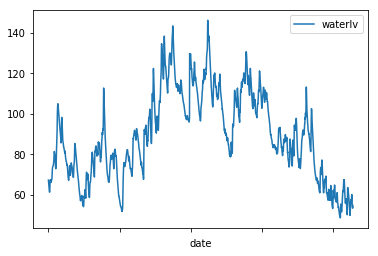

In [8]:
#wykres zmiany poziomu morza w czasie
frame.plot(x='date', y='waterlv')

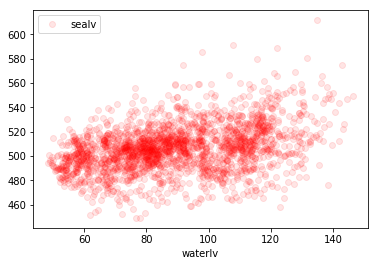

In [9]:
#wykres poziom wody w piezometrze w stosunku do poziomu wody w morzu
frame.plot(x='waterlv', y='sealv', style='ro', alpha=0.1)

In [10]:
#zamiana kolumny z datami na typ datetime
frame['date'] = pd.to_datetime(frame['date'])
print (frame['date'].dtype)
frame.set_index(frame["date"],inplace=True)
#suma poziomu wody w piezometrze dla miesiecy
df1 = frame['waterlv'].resample('M', how='sum')

datetime64[ns]


/home/agnieszka/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  


In [11]:
#zamiana na radiany
frame['wind'] = frame['dwind'].apply(math.radians)
#sin
frame['sin'] = frame['wind'].apply(math.sin)
#cos
frame['cos'] = frame['wind'].apply(math.cos)

In [12]:
frame[0:10]

date  waterlv  watertemp   sealv  precip   temp  vwind  \
date                                                                      
2008-09-23 2008-09-23    67.21      12.57  493.50     0.0  12.13   3.88   
2008-09-24 2008-09-24    66.29      12.56  490.67     0.0  10.86   4.50   
2008-09-25 2008-09-25    65.21      12.54  486.67     0.0  10.05   2.63   
2008-09-26 2008-09-26    64.33      12.53  481.00     0.0   9.54   1.88   
2008-09-27 2008-09-27    63.40      12.51  480.67     0.0  13.00   6.63   
2008-09-28 2008-09-28    62.59      12.49  479.33     0.9  13.15   7.75   
2008-09-29 2008-09-29    61.62      12.47  493.00     5.7  10.96   6.13   
2008-09-30 2008-09-30    61.48      12.44  492.00     2.4  10.29   6.13   
2008-10-01 2008-10-01    61.23      12.42  493.50     9.6  11.06   9.25   
2008-10-02 2008-10-02    61.33      12.40  497.83     0.0  10.30  11.38   

             dwind      wind       sin       cos  
date                                              
2008-09-23   66.25  1.156281  0.915311  0.402747  
2008-09-24   53.75  0.938114  0.806445  0.591310  
2008-09-25   30.00  0.523599  0.500000  0.866025  
2008-09-26  212.50  3.708825 -0.537300 -0.843391  
2008-09-27  242.50  4.232423 -0.887011 -0.461749  
2008-09-28  255.00  4.450590 -0.965926 -0.258819  
2008-09-29  240.00  4.188790 -0.866025 -0.500000  
2008-09-30  207.50  3.621558 -0.461749 -0.887011  
2008-10-01  213.75  3.730641 -0.555570 -0.831470  
2008-10-02  220.00  3.839724 -0.642788 -0.766044

In [13]:
#tworzenie kolumn z wartosciami opadow od 1 do 5 dni wstecz
def precip_before(date, days_count):
    key = date - timedelta(days=days_count)
    if key in frame.index:
        return frame.loc[key]['precip']
    else:
        return None
    
for i in range(1,6):
    frame['precip'+ str(i)] = frame['date'].apply(lambda x : precip_before(x, i))

In [14]:
frame[10:20]

date  waterlv  watertemp   sealv  precip   temp  vwind  \
date                                                                      
2008-10-03 2008-10-03    63.72      12.39  506.17     0.2   9.19   7.00   
2008-10-04 2008-10-04    65.63      12.37  506.50     0.0   8.95   6.38   
2008-10-05 2008-10-05    66.91      12.35  483.67     0.5   8.83   7.88   
2008-10-06 2008-10-06    67.23      12.33  504.67     0.0   9.70   3.13   
2008-10-07 2008-10-07    67.23      12.30  513.67     0.0   6.55   1.88   
2008-10-08 2008-10-08    67.47      12.27  511.83     0.0   7.81   1.50   
2008-10-09 2008-10-09    66.82      12.25  508.67     0.4   9.65   3.38   
2008-10-10 2008-10-10    66.12      12.22  510.00     0.0  11.63   5.38   
2008-10-11 2008-10-11    66.33      12.19  497.50     0.0  13.06   6.25   
2008-10-12 2008-10-12    66.28      12.15  512.83     3.2  12.43   6.63   

             dwind      wind       sin       cos  precip1  precip2  precip3  \
date                                                                          
2008-10-03  211.25  3.687008 -0.518773 -0.854912      0.0      9.6      2.4   
2008-10-04  225.00  3.926991 -0.707107 -0.707107      0.2      0.0      9.6   
2008-10-05  198.75  3.468842 -0.321439 -0.946930      0.0      0.2      0.0   
2008-10-06  237.50  4.145157 -0.843391 -0.537300      0.5      0.0      0.2   
2008-10-07  162.50  2.836160  0.300706 -0.953717      0.0      0.5      0.0   
2008-10-08  128.75  2.247111  0.779884 -0.625923      0.0      0.0      0.5   
2008-10-09  200.00  3.490659 -0.342020 -0.939693      0.0      0.0      0.0   
2008-10-10  243.75  4.254240 -0.896873 -0.442289      0.4      0.0      0.0   
2008-10-11  230.00  4.014257 -0.766044 -0.642788      0.0      0.4      0.0   
2008-10-12  252.50  4.406956 -0.953717 -0.300706      0.0      0.0      0.4   

            precip4  precip5  
date                          
2008-10-03      5.7      0.9  
2008-10-04      2.4      5.7  
2008-10-05      9.6      2.4  
2008-10-06      0.0      9.6  
2008-10-07      0.2      0.0  
2008-10-08      0.0      0.2  
2008-10-09      0.5      0.0  
2008-10-10      0.0      0.5  
2008-10-11      0.0      0.0  
2008-10-12      0.0      0.0

In [15]:
#tworzenie kolumny z suma opadow 5 dni wstecz
try:
    frame['precipsum']=frame.iloc[:,11:16].sum(axis=1)
except:
    None
        

In [16]:
frame[0:10]

date  waterlv  watertemp   sealv  precip   temp  vwind  \
date                                                                      
2008-09-23 2008-09-23    67.21      12.57  493.50     0.0  12.13   3.88   
2008-09-24 2008-09-24    66.29      12.56  490.67     0.0  10.86   4.50   
2008-09-25 2008-09-25    65.21      12.54  486.67     0.0  10.05   2.63   
2008-09-26 2008-09-26    64.33      12.53  481.00     0.0   9.54   1.88   
2008-09-27 2008-09-27    63.40      12.51  480.67     0.0  13.00   6.63   
2008-09-28 2008-09-28    62.59      12.49  479.33     0.9  13.15   7.75   
2008-09-29 2008-09-29    61.62      12.47  493.00     5.7  10.96   6.13   
2008-09-30 2008-09-30    61.48      12.44  492.00     2.4  10.29   6.13   
2008-10-01 2008-10-01    61.23      12.42  493.50     9.6  11.06   9.25   
2008-10-02 2008-10-02    61.33      12.40  497.83     0.0  10.30  11.38   

             dwind      wind       sin       cos  precip1  precip2  precip3  \
date                                                                          
2008-09-23   66.25  1.156281  0.915311  0.402747      NaN      NaN      NaN   
2008-09-24   53.75  0.938114  0.806445  0.591310      0.0      NaN      NaN   
2008-09-25   30.00  0.523599  0.500000  0.866025      0.0      0.0      NaN   
2008-09-26  212.50  3.708825 -0.537300 -0.843391      0.0      0.0      0.0   
2008-09-27  242.50  4.232423 -0.887011 -0.461749      0.0      0.0      0.0   
2008-09-28  255.00  4.450590 -0.965926 -0.258819      0.0      0.0      0.0   
2008-09-29  240.00  4.188790 -0.866025 -0.500000      0.9      0.0      0.0   
2008-09-30  207.50  3.621558 -0.461749 -0.887011      5.7      0.9      0.0   
2008-10-01  213.75  3.730641 -0.555570 -0.831470      2.4      5.7      0.9   
2008-10-02  220.00  3.839724 -0.642788 -0.766044      9.6      2.4      5.7   

            precip4  precip5  precipsum  
date                                     
2008-09-23      NaN      NaN        0.0  
2008-09-24      NaN      NaN        0.0  
2008-09-25      NaN      NaN        0.0  
2008-09-26      NaN      NaN        0.0  
2008-09-27      0.0      NaN        0.0  
2008-09-28      0.0      0.0        0.0  
2008-09-29      0.0      0.0        0.9  
2008-09-30      0.0      0.0        6.6  
2008-10-01      0.0      0.0        9.0  
2008-10-02      0.9      0.0       18.6

In [17]:
#tworzenie kolumny ze srednia temperatura dla 5 dni wstecz
def mean_temp5(date):
    tlist = []
    for i in range(1,6):
        key = date - timedelta(days=i)
        if key in frame.index:
            tlist.append(frame.loc[key]['temp'])
        else:
            return None
    return np.mean(tlist)

frame['meantemp'] = frame['date'].apply(mean_temp5)

In [18]:
frame[0:10]

date  waterlv  watertemp   sealv  precip   temp  vwind  \
date                                                                      
2008-09-23 2008-09-23    67.21      12.57  493.50     0.0  12.13   3.88   
2008-09-24 2008-09-24    66.29      12.56  490.67     0.0  10.86   4.50   
2008-09-25 2008-09-25    65.21      12.54  486.67     0.0  10.05   2.63   
2008-09-26 2008-09-26    64.33      12.53  481.00     0.0   9.54   1.88   
2008-09-27 2008-09-27    63.40      12.51  480.67     0.0  13.00   6.63   
2008-09-28 2008-09-28    62.59      12.49  479.33     0.9  13.15   7.75   
2008-09-29 2008-09-29    61.62      12.47  493.00     5.7  10.96   6.13   
2008-09-30 2008-09-30    61.48      12.44  492.00     2.4  10.29   6.13   
2008-10-01 2008-10-01    61.23      12.42  493.50     9.6  11.06   9.25   
2008-10-02 2008-10-02    61.33      12.40  497.83     0.0  10.30  11.38   

             dwind      wind       sin       cos  precip1  precip2  precip3  \
date                                                                          
2008-09-23   66.25  1.156281  0.915311  0.402747      NaN      NaN      NaN   
2008-09-24   53.75  0.938114  0.806445  0.591310      0.0      NaN      NaN   
2008-09-25   30.00  0.523599  0.500000  0.866025      0.0      0.0      NaN   
2008-09-26  212.50  3.708825 -0.537300 -0.843391      0.0      0.0      0.0   
2008-09-27  242.50  4.232423 -0.887011 -0.461749      0.0      0.0      0.0   
2008-09-28  255.00  4.450590 -0.965926 -0.258819      0.0      0.0      0.0   
2008-09-29  240.00  4.188790 -0.866025 -0.500000      0.9      0.0      0.0   
2008-09-30  207.50  3.621558 -0.461749 -0.887011      5.7      0.9      0.0   
2008-10-01  213.75  3.730641 -0.555570 -0.831470      2.4      5.7      0.9   
2008-10-02  220.00  3.839724 -0.642788 -0.766044      9.6      2.4      5.7   

            precip4  precip5  precipsum  meantemp  
date                                               
2008-09-23      NaN      NaN        0.0       NaN  
2008-09-24      NaN      NaN        0.0       NaN  
2008-09-25      NaN      NaN        0.0       NaN  
2008-09-26      NaN      NaN        0.0       NaN  
2008-09-27      0.0      NaN        0.0       NaN  
2008-09-28      0.0      0.0        0.0    11.116  
2008-09-29      0.0      0.0        0.9    11.320  
2008-09-30      0.0      0.0        6.6    11.340  
2008-10-01      0.0      0.0        9.0    11.388  
2008-10-02      0.9      0.0       18.6    11.692

In [19]:
# usuniecie wierszy z NaN
frame = frame.dropna()
frame[0:10]

date  waterlv  watertemp   sealv  precip   temp  vwind  \
date                                                                      
2008-09-28 2008-09-28    62.59      12.49  479.33     0.9  13.15   7.75   
2008-09-29 2008-09-29    61.62      12.47  493.00     5.7  10.96   6.13   
2008-09-30 2008-09-30    61.48      12.44  492.00     2.4  10.29   6.13   
2008-10-01 2008-10-01    61.23      12.42  493.50     9.6  11.06   9.25   
2008-10-02 2008-10-02    61.33      12.40  497.83     0.0  10.30  11.38   
2008-10-03 2008-10-03    63.72      12.39  506.17     0.2   9.19   7.00   
2008-10-04 2008-10-04    65.63      12.37  506.50     0.0   8.95   6.38   
2008-10-05 2008-10-05    66.91      12.35  483.67     0.5   8.83   7.88   
2008-10-06 2008-10-06    67.23      12.33  504.67     0.0   9.70   3.13   
2008-10-07 2008-10-07    67.23      12.30  513.67     0.0   6.55   1.88   

             dwind      wind       sin       cos  precip1  precip2  precip3  \
date                                                                          
2008-09-28  255.00  4.450590 -0.965926 -0.258819      0.0      0.0      0.0   
2008-09-29  240.00  4.188790 -0.866025 -0.500000      0.9      0.0      0.0   
2008-09-30  207.50  3.621558 -0.461749 -0.887011      5.7      0.9      0.0   
2008-10-01  213.75  3.730641 -0.555570 -0.831470      2.4      5.7      0.9   
2008-10-02  220.00  3.839724 -0.642788 -0.766044      9.6      2.4      5.7   
2008-10-03  211.25  3.687008 -0.518773 -0.854912      0.0      9.6      2.4   
2008-10-04  225.00  3.926991 -0.707107 -0.707107      0.2      0.0      9.6   
2008-10-05  198.75  3.468842 -0.321439 -0.946930      0.0      0.2      0.0   
2008-10-06  237.50  4.145157 -0.843391 -0.537300      0.5      0.0      0.2   
2008-10-07  162.50  2.836160  0.300706 -0.953717      0.0      0.5      0.0   

            precip4  precip5  precipsum  meantemp  
date                                               
2008-09-28      0.0      0.0        0.0    11.116  
2008-09-29      0.0      0.0        0.9    11.320  
2008-09-30      0.0      0.0        6.6    11.340  
2008-10-01      0.0      0.0        9.0    11.388  
2008-10-02      0.9      0.0       18.6    11.692  
2008-10-03      5.7      0.9       18.6    11.152  
2008-10-04      2.4      5.7       17.9    10.360  
2008-10-05      9.6      2.4       12.2     9.958  
2008-10-06      0.0      9.6       10.3     9.666  
2008-10-07      0.2      0.0        0.7     9.394

In [20]:
# zapis do pliku csv
frame.to_csv('result.csv')

Eksploracja

In [21]:
#shape
frame.shape
type(frame)

pandas.core.frame.DataFrame

In [22]:
#data types
print(frame.dtypes)

date         datetime64[ns]
waterlv             float64
watertemp           float64
sealv               float64
precip              float64
temp                float64
vwind               float64
dwind               float64
wind                float64
sin                 float64
cos                 float64
precip1             float64
precip2             float64
precip3             float64
precip4             float64
precip5             float64
precipsum           float64
meantemp            float64
dtype: object


In [23]:
#head
frame.head(15)

date  waterlv  watertemp   sealv  precip   temp  vwind  \
date                                                                      
2008-09-28 2008-09-28    62.59      12.49  479.33     0.9  13.15   7.75   
2008-09-29 2008-09-29    61.62      12.47  493.00     5.7  10.96   6.13   
2008-09-30 2008-09-30    61.48      12.44  492.00     2.4  10.29   6.13   
2008-10-01 2008-10-01    61.23      12.42  493.50     9.6  11.06   9.25   
2008-10-02 2008-10-02    61.33      12.40  497.83     0.0  10.30  11.38   
2008-10-03 2008-10-03    63.72      12.39  506.17     0.2   9.19   7.00   
2008-10-04 2008-10-04    65.63      12.37  506.50     0.0   8.95   6.38   
2008-10-05 2008-10-05    66.91      12.35  483.67     0.5   8.83   7.88   
2008-10-06 2008-10-06    67.23      12.33  504.67     0.0   9.70   3.13   
2008-10-07 2008-10-07    67.23      12.30  513.67     0.0   6.55   1.88   
2008-10-08 2008-10-08    67.47      12.27  511.83     0.0   7.81   1.50   
2008-10-09 2008-10-09    66.82      12.25  508.67     0.4   9.65   3.38   
2008-10-10 2008-10-10    66.12      12.22  510.00     0.0  11.63   5.38   
2008-10-11 2008-10-11    66.33      12.19  497.50     0.0  13.06   6.25   
2008-10-12 2008-10-12    66.28      12.15  512.83     3.2  12.43   6.63   

             dwind      wind       sin       cos  precip1  precip2  precip3  \
date                                                                          
2008-09-28  255.00  4.450590 -0.965926 -0.258819      0.0      0.0      0.0   
2008-09-29  240.00  4.188790 -0.866025 -0.500000      0.9      0.0      0.0   
2008-09-30  207.50  3.621558 -0.461749 -0.887011      5.7      0.9      0.0   
2008-10-01  213.75  3.730641 -0.555570 -0.831470      2.4      5.7      0.9   
2008-10-02  220.00  3.839724 -0.642788 -0.766044      9.6      2.4      5.7   
2008-10-03  211.25  3.687008 -0.518773 -0.854912      0.0      9.6      2.4   
2008-10-04  225.00  3.926991 -0.707107 -0.707107      0.2      0.0      9.6   
2008-10-05  198.75  3.468842 -0.321439 -0.946930      0.0      0.2      0.0   
2008-10-06  237.50  4.145157 -0.843391 -0.537300      0.5      0.0      0.2   
2008-10-07  162.50  2.836160  0.300706 -0.953717      0.0      0.5      0.0   
2008-10-08  128.75  2.247111  0.779884 -0.625923      0.0      0.0      0.5   
2008-10-09  200.00  3.490659 -0.342020 -0.939693      0.0      0.0      0.0   
2008-10-10  243.75  4.254240 -0.896873 -0.442289      0.4      0.0      0.0   
2008-10-11  230.00  4.014257 -0.766044 -0.642788      0.0      0.4      0.0   
2008-10-12  252.50  4.406956 -0.953717 -0.300706      0.0      0.0      0.4   

            precip4  precip5  precipsum  meantemp  
date                                               
2008-09-28      0.0      0.0        0.0    11.116  
2008-09-29      0.0      0.0        0.9    11.320  
2008-09-30      0.0      0.0        6.6    11.340  
2008-10-01      0.0      0.0        9.0    11.388  
2008-10-02      0.9      0.0       18.6    11.692  
2008-10-03      5.7      0.9       18.6    11.152  
2008-10-04      2.4      5.7       17.9    10.360  
2008-10-05      9.6      2.4       12.2     9.958  
2008-10-06      0.0      9.6       10.3     9.666  
2008-10-07      0.2      0.0        0.7     9.394  
2008-10-08      0.0      0.2        0.7     8.644  
2008-10-09      0.5      0.0        0.5     8.368  
2008-10-10      0.0      0.5        0.9     8.508  
2008-10-11      0.0      0.0        0.4     9.068  
2008-10-12      0.0      0.0        0.4     9.740

In [24]:
#descriptions
print(frame.describe())

           waterlv    watertemp        sealv       precip         temp  \
count  2129.000000  2129.000000  2129.000000  2129.000000  2129.000000   
mean     89.282353     9.550714   506.334171     1.905838     7.919333   
std      21.178420     2.011780    19.060688     4.318492     7.436094   
min      48.500000     6.320000   449.270000     0.000000   -16.580000   
25%      73.500000     7.690000   494.330000     0.000000     2.630000   
50%      87.260000     9.330000   506.000000     0.090000     7.590000   
75%     106.910000    11.570000   516.600000     1.700000    13.980000   
max     146.330000    12.800000   611.440000    47.000000    27.810000   

             vwind        dwind         wind          sin          cos  \
count  2129.000000  2129.000000  2129.000000  2129.000000  2129.000000   
mean      4.606801   180.649624     3.152931    -0.077259    -0.412117   
std       2.243889    70.911251     1.237635     0.746914     0.516428   
min       0.380000    13.750000     0

In [25]:
df = frame[frame.columns.difference(['date', 'wind', 'dwind'])]
framey = df[df.columns.difference(['waterlv'])]
df[0:3]

cos  meantemp  precip  precip1  precip2  precip3  precip4  \
date                                                                         
2008-09-28 -0.258819    11.116     0.9      0.0      0.0      0.0      0.0   
2008-09-29 -0.500000    11.320     5.7      0.9      0.0      0.0      0.0   
2008-09-30 -0.887011    11.340     2.4      5.7      0.9      0.0      0.0   

            precip5  precipsum   sealv       sin   temp  vwind  waterlv  \
date                                                                      
2008-09-28      0.0        0.0  479.33 -0.965926  13.15   7.75    62.59   
2008-09-29      0.0        0.9  493.00 -0.866025  10.96   6.13    61.62   
2008-09-30      0.0        6.6  492.00 -0.461749  10.29   6.13    61.48   

            watertemp  
date                   
2008-09-28      12.49  
2008-09-29      12.47  
2008-09-30      12.44

In [26]:
#correlation
corr = frame.corr(method = 'pearson')
print(corr)

            waterlv  watertemp     sealv    precip      temp     vwind  \
waterlv    1.000000  -0.098659  0.359107  0.005270 -0.337894 -0.000283   
watertemp -0.098659   1.000000  0.341774  0.155111  0.539043 -0.009573   
sealv      0.359107   0.341774  1.000000  0.176834  0.149137  0.053729   
precip     0.005270   0.155111  0.176834  1.000000  0.144730  0.126234   
temp      -0.337894   0.539043  0.149137  0.144730  1.000000  0.026328   
vwind     -0.000283  -0.009573  0.053729  0.126234  0.026328  1.000000   
dwind      0.068600   0.081435  0.158080  0.076639  0.069502  0.357772   
wind       0.068600   0.081435  0.158080  0.076639  0.069502  0.357772   
sin       -0.058936  -0.066363 -0.144572 -0.083203 -0.085488 -0.424402   
cos       -0.024073  -0.119819  0.119697 -0.055976  0.025587  0.133401   
precip1    0.026013   0.157001  0.230579  0.176040  0.116302  0.188780   
precip2    0.058660   0.158838  0.191014  0.095769  0.100086  0.053903   
precip3    0.079909   0.159606  0.1739

/home/agnieszka/.local/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


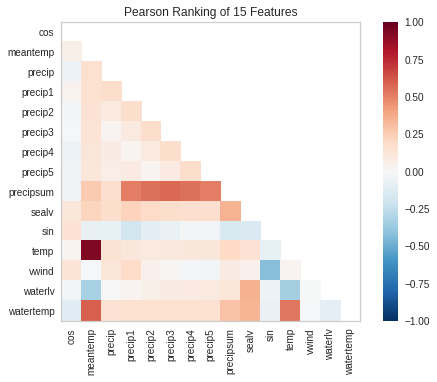

In [27]:
from yellowbrick.features import Rank2D

visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(df)
visualizer.poof()

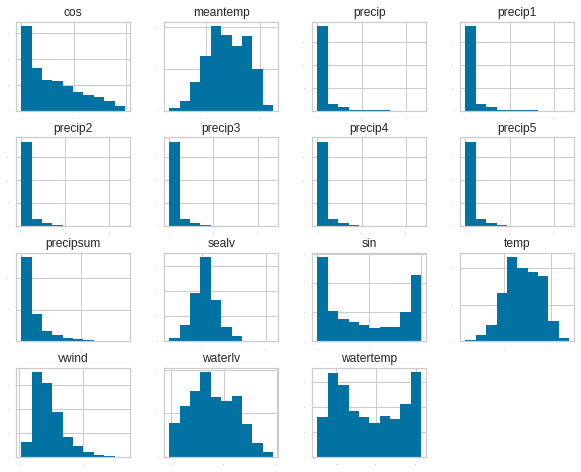

In [28]:
import matplotlib.pyplot as plt
#histograms
plt.rcParams['figure.figsize'] = [10, 8]
df.hist(sharex = False, sharey = False, xlabelsize = 1, ylabelsize = 1)
plt.show()

In [29]:
import seaborn as sns
sns.set(style="ticks")

#sns.pairplot(data=frame, kind="reg")

In [30]:
#skewness
skew = frame.skew()
print(skew)

waterlv      0.192278
watertemp    0.136306
sealv        0.428498
precip       4.210356
temp        -0.154314
vwind        1.160223
dwind       -0.320087
wind        -0.320087
sin          0.172266
cos          0.735983
precip1      4.203751
precip2      4.198780
precip3      4.211221
precip4      4.211071
precip5      4.206216
precipsum    1.983224
meantemp    -0.150414
dtype: float64


In [31]:
# funkcje wykonujaca transfromacje danych
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer


def getInverse(transformer, columns, x):
    inv = transformer.inverse_transform(x)
    inv = pd.DataFrame(inv)
    inv.columns = columns
    return inv

def transform(tr, x):
    tr = tr.fit(x)
    transformed = tr.transform(x)
    transformed = pd.DataFrame(transformed)
    transformed.columns = x.columns
    inverse = lambda inv: getInverse(tr, x.columns, inv)
    return transformed, inverse

def transformY(invTrans, y):
    _, cols = df.shape
    rows = y.shape[0]
    temp = np.zeros((rows, cols))
    temp[:, df.columns.get_loc("waterlv")] = y
    return np.array(invTrans(temp)['waterlv'])


pt, invPt = transform(PowerTransformer(), df)
qt, invQt = transform(QuantileTransformer(), df)

In [32]:
pt[0:3]

cos  meantemp    precip   precip1   precip2  precip3   precip4  \
0  0.506686  0.442775  0.621362 -0.887044 -0.886836 -0.88572 -0.884847   
1 -0.000770  0.471049  1.588824  0.618927 -0.886836 -0.88572 -0.884847   
2 -1.002154  0.473821  1.252593  1.587313  0.616872 -0.88572 -0.884847   

    precip5  precipsum     sealv       sin      temp     vwind   waterlv  \
0 -0.884599  -1.557798 -1.489672 -1.234428  0.703069  1.343533 -1.307498   
1 -0.884599  -0.995177 -0.680707 -1.077695  0.405022  0.832361 -1.362830   
2 -0.884599   0.224872 -0.737806 -0.466255  0.313974  0.832361 -1.370855   

   watertemp  
0   1.383112  
1   1.375174  
2   1.363247

In [33]:
qt[0:3]

cos  meantemp    precip       precip1       precip2       precip3  \
0  0.660661  0.632516  0.683684  1.000000e-07  1.000000e-07  1.000000e-07   
1  0.527528  0.639579  0.893894  6.836837e-01  1.000000e-07  1.000000e-07   
2  0.237738  0.640461  0.791291  8.933934e-01  6.836837e-01  1.000000e-07   

        precip4       precip5     precipsum     sealv       sin      temp  \
0  1.000000e-07  1.000000e-07  1.000000e-07  0.069069  0.121121  0.707708   
1  1.000000e-07  1.000000e-07  2.312312e-01  0.229229  0.227227  0.627385   
2  1.000000e-07  1.000000e-07  5.505506e-01  0.213714  0.417417  0.600601   

      vwind   waterlv  watertemp  
0  0.901902  0.124934   0.938939  
1  0.788789  0.114695   0.935936  
2  0.788789  0.112923   0.931932

In [34]:
df[0:3]

cos  meantemp  precip  precip1  precip2  precip3  precip4  \
date                                                                         
2008-09-28 -0.258819    11.116     0.9      0.0      0.0      0.0      0.0   
2008-09-29 -0.500000    11.320     5.7      0.9      0.0      0.0      0.0   
2008-09-30 -0.887011    11.340     2.4      5.7      0.9      0.0      0.0   

            precip5  precipsum   sealv       sin   temp  vwind  waterlv  \
date                                                                      
2008-09-28      0.0        0.0  479.33 -0.965926  13.15   7.75    62.59   
2008-09-29      0.0        0.9  493.00 -0.866025  10.96   6.13    61.62   
2008-09-30      0.0        6.6  492.00 -0.461749  10.29   6.13    61.48   

            watertemp  
date                   
2008-09-28      12.49  
2008-09-29      12.47  
2008-09-30      12.44

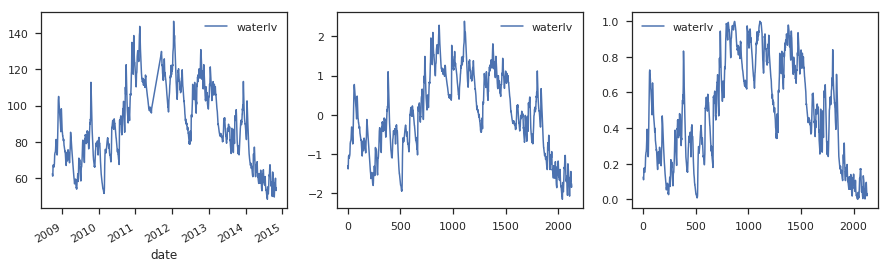

In [35]:
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(15,4))
df.plot(y='waterlv', ax=ax1)
pt.plot(y='waterlv', ax=ax2)
qt.plot(y='waterlv', ax=ax3)

In [36]:
pcorr = pt.corr(method = 'pearson')
print(pcorr)

                cos  meantemp    precip   precip1   precip2   precip3  \
cos        1.000000  0.057779 -0.115749  0.008610 -0.038620 -0.030308   
meantemp   0.057779  1.000000  0.037525  0.040945  0.037221  0.025048   
precip    -0.115749  0.037525  1.000000  0.320791  0.128542  0.097410   
precip1    0.008610  0.040945  0.320791  1.000000  0.321788  0.129093   
precip2   -0.038620  0.037221  0.128542  0.321788  1.000000  0.321678   
precip3   -0.030308  0.025048  0.097410  0.129093  0.321678  1.000000   
precip4   -0.078159  0.012302  0.084613  0.097238  0.128552  0.322001   
precip5   -0.067494 -0.000772  0.066484  0.086839  0.098786  0.127036   
precipsum -0.067190  0.184290  0.219883  0.497678  0.546493  0.556498   
sealv      0.115097  0.249574  0.218059  0.307488  0.274971  0.252855   
sin        0.077828 -0.073176 -0.183687 -0.269931 -0.157978 -0.077963   
temp       0.023729  0.930483  0.043467  0.008609 -0.017671 -0.019132   
vwind      0.163841  0.013933  0.201824  0.211991  

cos          0.252897
meantemp    -0.152983
precip       0.640983
precip1      0.639891
precip2      0.639062
precip3      0.641183
precip4      0.642504
precip5      0.642594
precipsum   -0.001603
sealv       -0.016625
sin          0.087480
temp        -0.112746
vwind        0.003624
waterlv     -0.031245
watertemp   -0.009762
dtype: float64


/home/agnieszka/.local/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


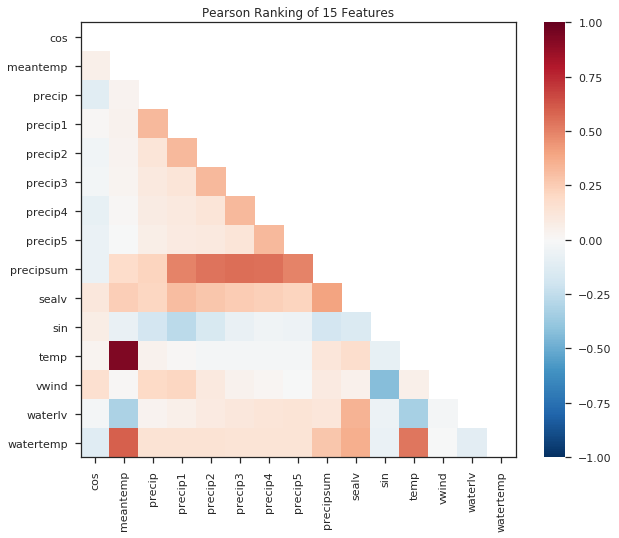

In [37]:
# transformed YeoJohnson skewness and correlation
print(pt.skew())
visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(pt)
visualizer.poof()

cos         -0.000193
meantemp     0.000020
precip      -0.064511
precip1     -0.064541
precip2     -0.064073
precip3     -0.062655
precip4     -0.061379
precip5     -0.060361
precipsum   -0.055915
sealv       -0.000007
sin         -0.000707
temp        -0.000029
vwind        0.000087
waterlv     -0.000019
watertemp   -0.000088
dtype: float64


/home/agnieszka/.local/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


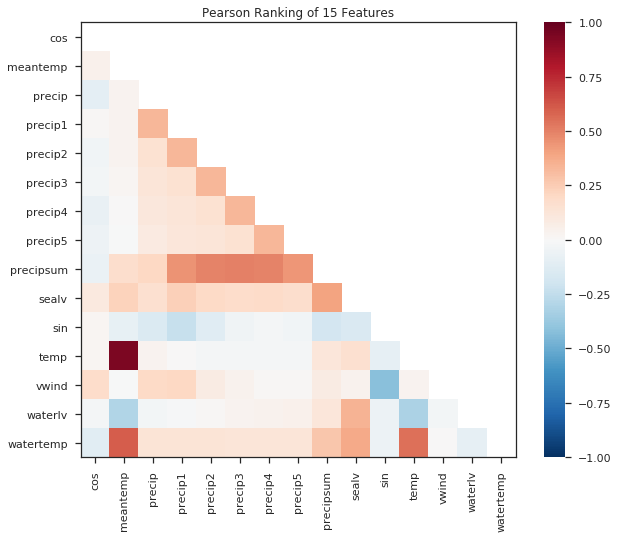

In [38]:
# transformed Quantile Transform skewness and correlation
print(qt.skew())
visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(qt)
visualizer.poof()

In [39]:
waterlv_index = df.columns.get_loc("waterlv")
waterlv_index

13

In [87]:
#split-out validation dataset
from sklearn.model_selection import train_test_split
array = df.values
X = array[:, (0,1,2,3,4,5,6,7,8,9,10,11,12,14)].astype(np.float)
Y = array[:, waterlv_index].astype(np.float)
validation_size = 0.20
seed = 7 
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y, test_size = validation_size, random_state = seed)

In [88]:
#split-out after YeoJohnson transformation
tarray = pt.values
Xt = tarray[:, (0,1,2,3,4,5,6,7,8,9,10,11,12,14)].astype(np.float)
Yt = tarray[:, waterlv_index].astype(np.float)
validation_size = 0.20
seed = 7 
Xt_train, Xt_validation, Yt_train, Yt_validation = train_test_split(Xt,Yt, test_size = validation_size, random_state = seed)

In [89]:
#split-out after Quantile Transformer
qarray = qt.values
Xq = qarray[:, (0,1,2,3,4,5,6,7,8,9,10,11,12,14)].astype(np.float)
Yq = qarray[:, waterlv_index].astype(np.float)
validation_size = 0.20
seed = 7 
Xq_train, Xq_validation, Yq_train, Yq_validation = train_test_split(Xq,Yq, test_size = validation_size, random_state = seed)

In [90]:
def evaluation(clf, X_train, Y_train, X_test, Y_test, invTr = None):
    if invTr is None:
        tr = lambda y: y
    else:
        tr = lambda y: transformY(invTr, y)
    train = tr(Y_train)
    train_pred = tr(clf.predict(X_train))
    test = tr(Y_test)
    test_pred = tr(clf.predict(X_test))
    show_evaluation(train, train_pred, test, test_pred)

def show_evaluation(train, train_pred, test, test_pred):
    print ("RMSE training set:", np.sqrt(mean_squared_error(train, train_pred)))
    print ("RMSE testing set:", np.sqrt(mean_squared_error(test, test_pred)))
    print ("MAE training set:", mean_absolute_error(train, train_pred))
    print ("MAE testing set:", mean_absolute_error(test, test_pred))
    
    fig, ax = plt.subplots()
    lbls = ['train', 'test']
    trainplot = sns.scatterplot(train,train_pred,ax=ax)
    testplot = sns.scatterplot(test,test_pred)
    plt.legend((trainplot, testplot), labels =lbls, loc='upper left')
    plt.show()
    

In [91]:
def evaluateClf(clf, params):
    orig_clf = clf(**params)
    pt_clf = clf(**params)
    qt_clf = clf(**params)
    print(orig_clf)
    
    orig_clf.fit(X_train, Y_train)
    pt_clf.fit(Xt_train, Yt_train)
    qt_clf.fit(Xq_train, Yq_train)
    
    evaluation(orig_clf, X_train, Y_train, X_validation, Y_validation)
    evaluation(pt_clf, Xt_train, Yt_train, Xt_validation, Yt_validation, invPt)
    evaluation(qt_clf, Xq_train, Yq_train, Xq_validation, Yq_validation, invQt)

**Random Forest**

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)
RMSE training set: 12.904068140309075
RMSE testing set: 14.928845337765203
MAE training set: 10.76263758605887
MAE testing set: 12.490591940361016


/home/agnieszka/.local/lib/python3.6/site-packages/matplotlib/legend.py:1364: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


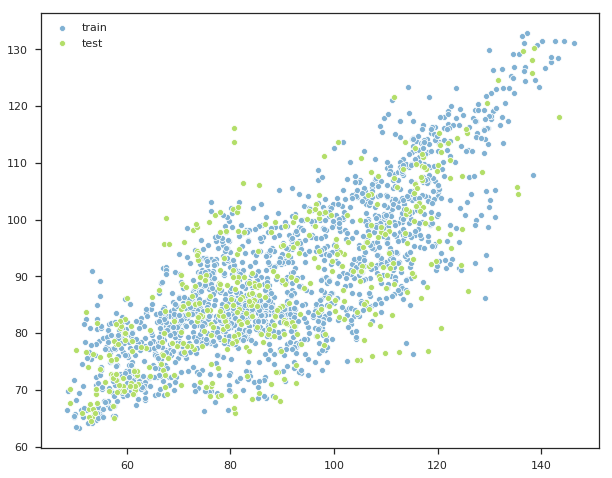

RMSE training set: 12.886745583556527
RMSE testing set: 14.977684110268207
MAE training set: 10.684418609908732
MAE testing set: 12.3938517778197


/home/agnieszka/.local/lib/python3.6/site-packages/matplotlib/legend.py:1364: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


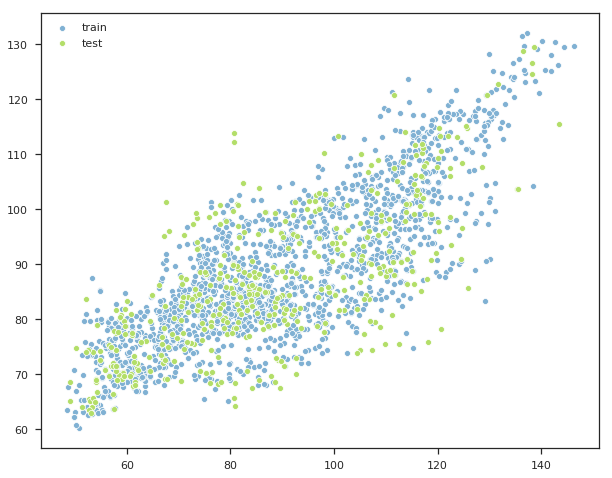

RMSE training set: 13.493150635958248
RMSE testing set: 15.32220962153072
MAE training set: 11.139565387937436
MAE testing set: 12.738005846063128


/home/agnieszka/.local/lib/python3.6/site-packages/matplotlib/legend.py:1364: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


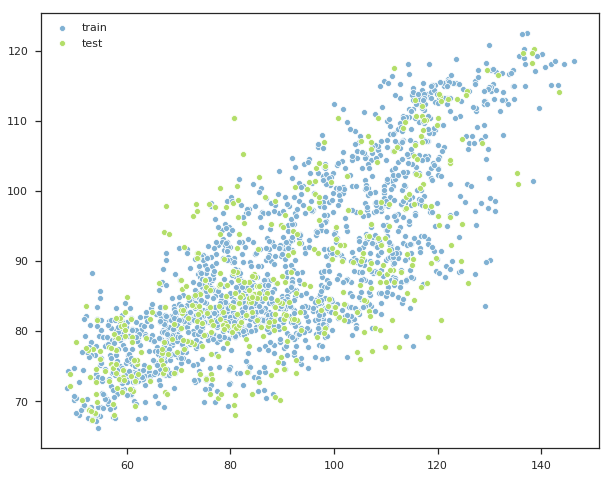

In [200]:
from sklearn.ensemble import RandomForestRegressor
evaluateClf(RandomForestRegressor, { 'n_estimators':200, 'max_depth': 6, 'random_state': 0})

**Ridge**

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
RMSE training set: 17.49619375019268
RMSE testing set: 17.676834819595065
MAE training set: 14.815314309469587
MAE testing set: 14.920167278652062


/home/agnieszka/.local/lib/python3.6/site-packages/matplotlib/legend.py:1364: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


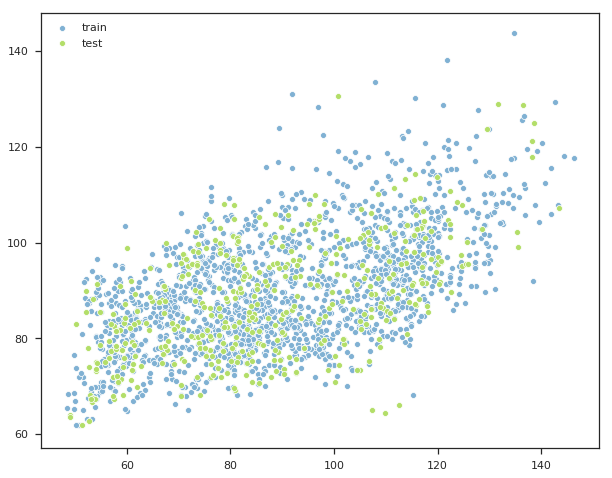

RMSE training set: 17.51913973180264
RMSE testing set: 17.78040145065443
MAE training set: 14.923004270362442
MAE testing set: 14.974485578730858


/home/agnieszka/.local/lib/python3.6/site-packages/matplotlib/legend.py:1364: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


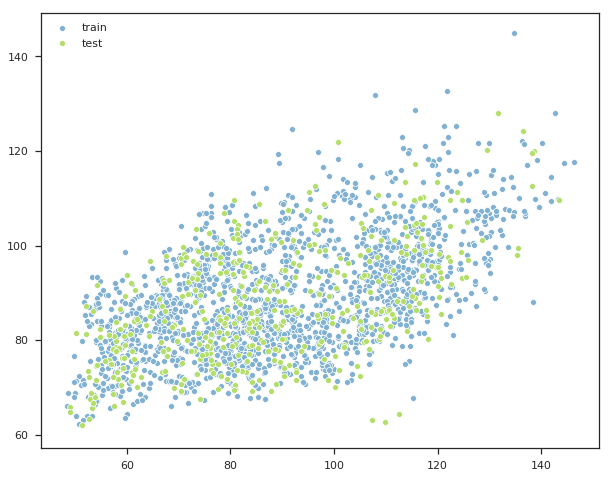

RMSE training set: 17.318775598019286
RMSE testing set: 17.43546101111901
MAE training set: 14.773295691939945
MAE testing set: 14.861202488516783


/home/agnieszka/.local/lib/python3.6/site-packages/matplotlib/legend.py:1364: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


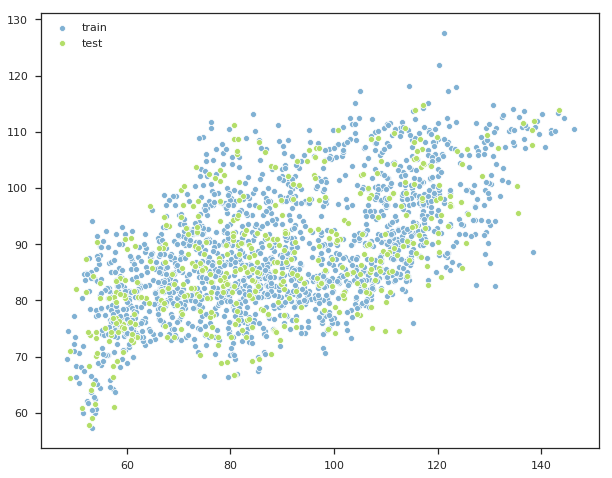

In [201]:
from sklearn import linear_model
evaluateClf(linear_model.Ridge, { 'alpha':.5})

**Lasso**

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
RMSE training set: 17.541713701412753
RMSE testing set: 17.680088953508882
MAE training set: 14.866668788276241
MAE testing set: 14.962602362247136


/home/agnieszka/.local/lib/python3.6/site-packages/matplotlib/legend.py:1364: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


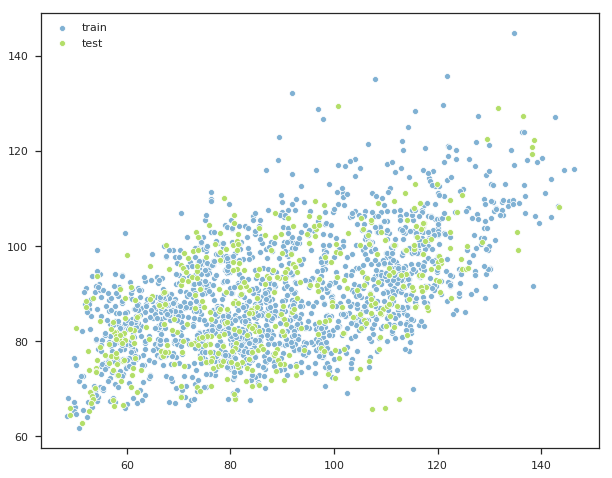

RMSE training set: 21.22092303390009
RMSE testing set: 21.104479900238815
MAE training set: 17.751734697210864
MAE testing set: 17.642379805364875


/home/agnieszka/.local/lib/python3.6/site-packages/matplotlib/legend.py:1364: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


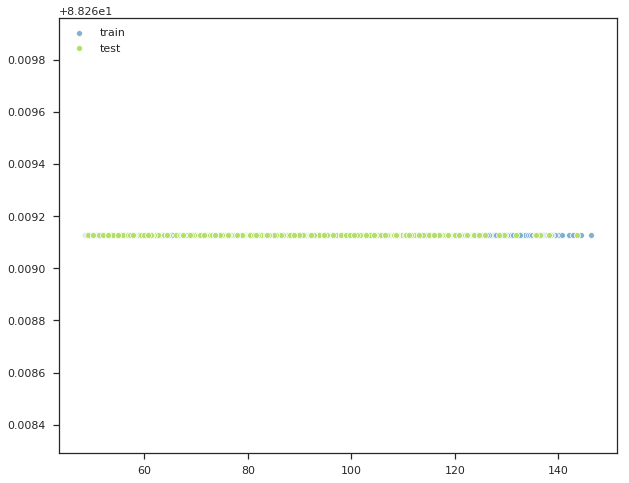

RMSE training set: 21.292324914839654
RMSE testing set: 21.105085633933022
MAE training set: 17.740603477379178
MAE testing set: 17.589658855770423


/home/agnieszka/.local/lib/python3.6/site-packages/matplotlib/legend.py:1364: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


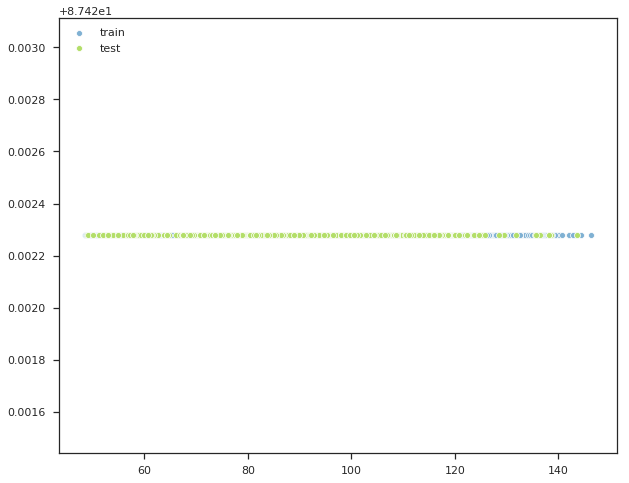

In [202]:
evaluateClf(linear_model.Lasso, { 'alpha':0.5})

**Elastic Net**

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)
RMSE training set: 17.4981176968834
RMSE testing set: 17.672664661282045
MAE training set: 14.819245768774232
MAE testing set: 14.926335008635867


/home/agnieszka/.local/lib/python3.6/site-packages/matplotlib/legend.py:1364: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


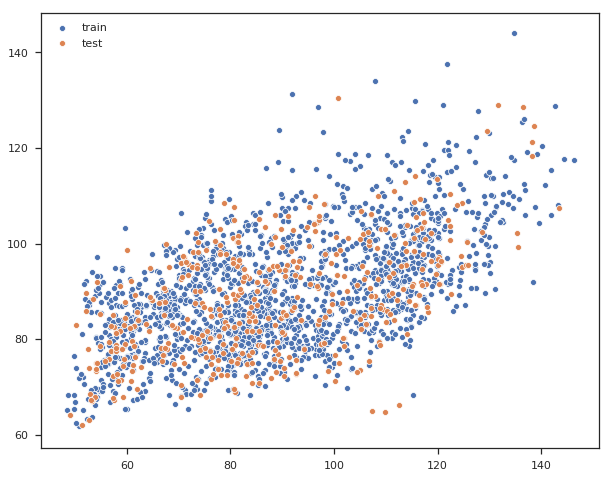

RMSE training set: 17.85486623993367
RMSE testing set: 17.98045726683447
MAE training set: 15.179369350148304
MAE testing set: 15.260608704669808


/home/agnieszka/.local/lib/python3.6/site-packages/matplotlib/legend.py:1364: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


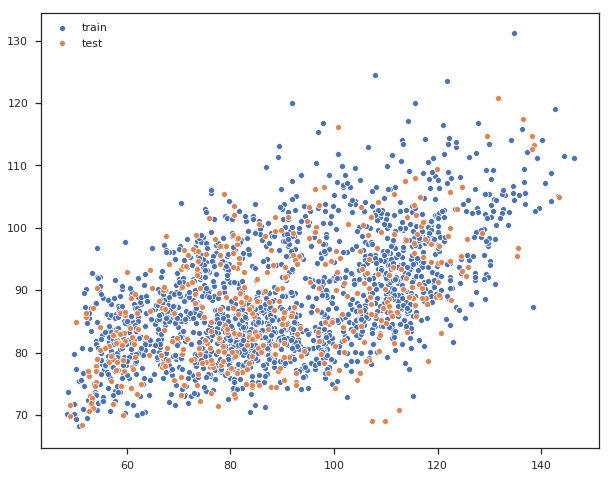

RMSE training set: 21.292324914839654
RMSE testing set: 21.105085633933022
MAE training set: 17.740603477379178
MAE testing set: 17.589658855770423


/home/agnieszka/.local/lib/python3.6/site-packages/matplotlib/legend.py:1364: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


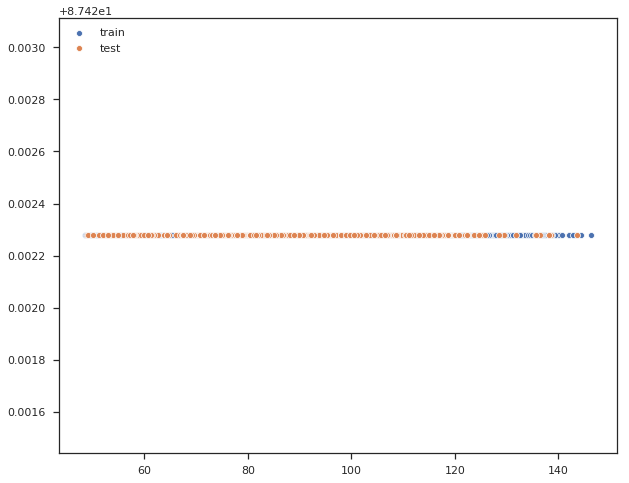

In [95]:
from sklearn.linear_model import ElasticNet
evaluateClf(ElasticNet, { 'alpha':0.1,'random_state':0})

**SVM**

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)


/home/agnieszka/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/agnieszka/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/agnieszka/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


RMSE training set: 12.99338432793751
RMSE testing set: 19.528966262751265
MAE training set: 8.714272447267549
MAE testing set: 15.914088199690871


/home/agnieszka/.local/lib/python3.6/site-packages/matplotlib/legend.py:1364: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


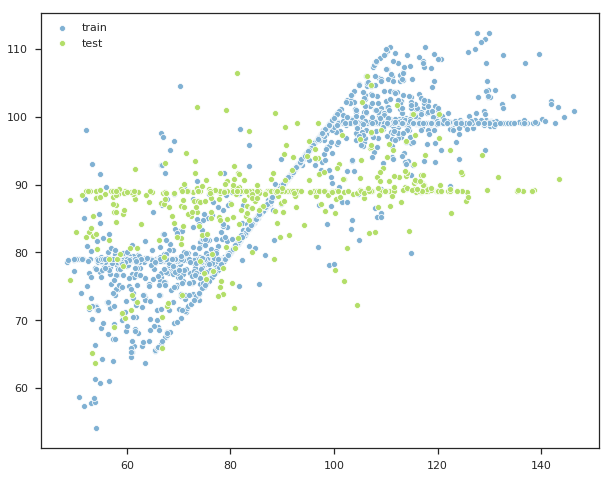

RMSE training set: 9.165736026681223
RMSE testing set: 17.660255031737012
MAE training set: 5.836553040368817
MAE testing set: 13.769958100719016


/home/agnieszka/.local/lib/python3.6/site-packages/matplotlib/legend.py:1364: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


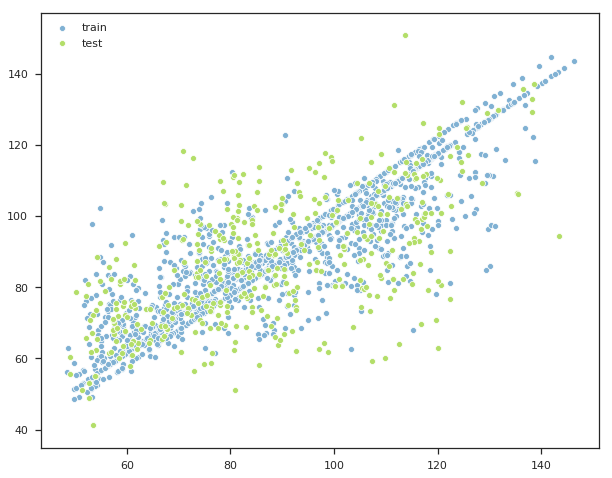

RMSE training set: 15.390889569225912
RMSE testing set: 17.27478217041792
MAE training set: 12.697202382823468
MAE testing set: 14.267795892164749


/home/agnieszka/.local/lib/python3.6/site-packages/matplotlib/legend.py:1364: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


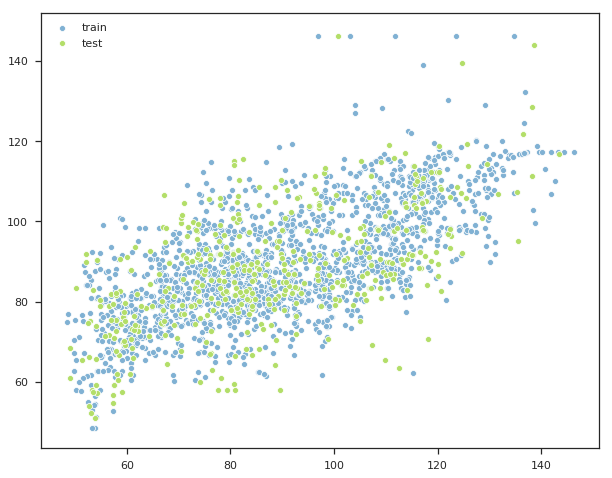

In [203]:
from sklearn import svm
evaluateClf(svm.SVR, {'C':10})

**Stochastic Gradient**

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=1000,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=0.001, validation_fraction=0.1,
       verbose=0, warm_start=False)
RMSE training set: 33144834088517.242
RMSE testing set: 33202916485524.85
MAE training set: 32715402530074.797
MAE testing set: 32788963408530.695


/home/agnieszka/.local/lib/python3.6/site-packages/matplotlib/legend.py:1364: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


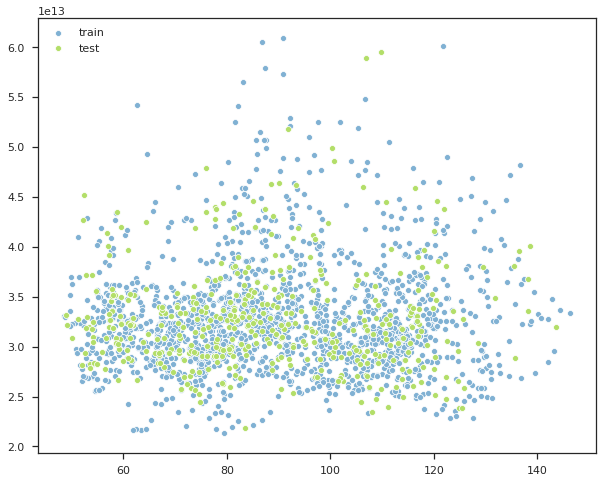

RMSE training set: 17.545949423333894
RMSE testing set: 17.819255558777513
MAE training set: 14.937086168602137
MAE testing set: 15.015517797260342


/home/agnieszka/.local/lib/python3.6/site-packages/matplotlib/legend.py:1364: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


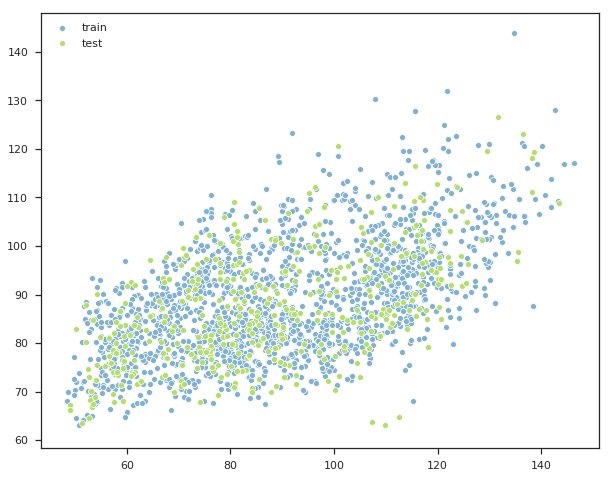

RMSE training set: 18.211941057966733
RMSE testing set: 18.48450864360136
MAE training set: 15.404258047948666
MAE testing set: 15.583007209867253


/home/agnieszka/.local/lib/python3.6/site-packages/matplotlib/legend.py:1364: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


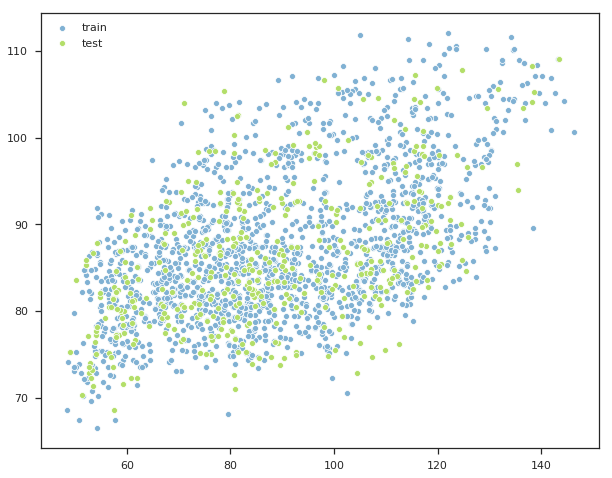

In [204]:
from sklearn.linear_model import SGDClassifier
evaluateClf(linear_model.SGDRegressor, {'max_iter':1000, 'tol':1e-3})

**Nearest Neighbors**

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')
RMSE training set: 14.678436153924523
RMSE testing set: 18.170457097870155
MAE training set: 11.822325308279506
MAE testing set: 15.18156338028169


/home/agnieszka/.local/lib/python3.6/site-packages/matplotlib/legend.py:1364: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


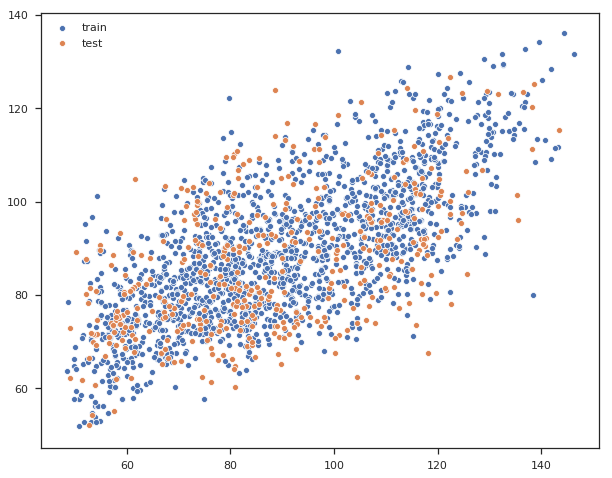

RMSE training set: 15.409696397988833
RMSE testing set: 18.473074093908753
MAE training set: 12.448305864113461
MAE testing set: 15.101203054013633


/home/agnieszka/.local/lib/python3.6/site-packages/matplotlib/legend.py:1364: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


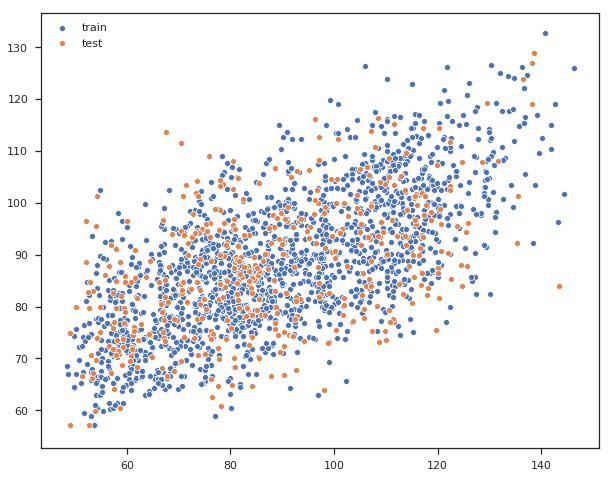

RMSE training set: 15.508305474975986
RMSE testing set: 18.37813700265014
MAE training set: 12.447263158314636
MAE testing set: 14.91178195630211


/home/agnieszka/.local/lib/python3.6/site-packages/matplotlib/legend.py:1364: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


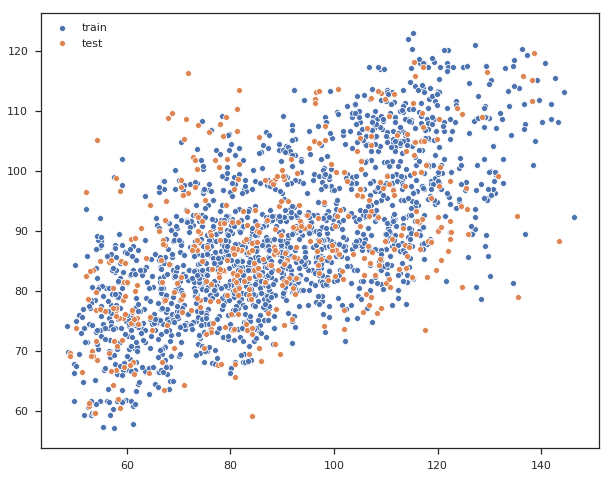

In [98]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X_train, Y_train) 
tneigh = KNeighborsRegressor(n_neighbors=5)
tneigh.fit(Xt_train, Yt_train) 
qneigh = KNeighborsRegressor(n_neighbors=5)
qneigh.fit(Xq_train, Yq_train)
evaluateClf(KNeighborsRegressor, {'n_neighbors':5})

**Robust linear model estimation using RANSAC**


RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        loss='absolute_loss', max_skips=inf, max_trials=100,
        min_samples=None, random_state=None, residual_threshold=None,
        stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)
RMSE training set: 25.60833791838426
RMSE testing set: 26.9660378930858
MAE training set: 20.154750320047906
MAE testing set: 21.044849741685095


/home/agnieszka/.local/lib/python3.6/site-packages/matplotlib/legend.py:1364: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


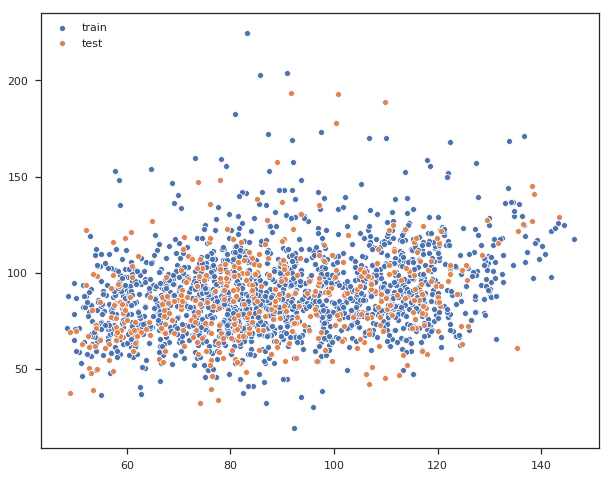

RMSE training set: 27.436660913329334
RMSE testing set: 25.889859392833127
MAE training set: 21.856010570243235
MAE testing set: 20.499155870885005


/home/agnieszka/.local/lib/python3.6/site-packages/matplotlib/legend.py:1364: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


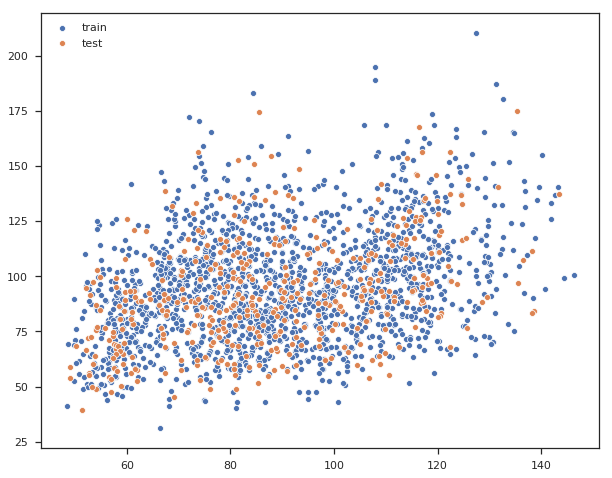

RMSE training set: 23.552461921950133
RMSE testing set: 22.71147169200736
MAE training set: 18.970433381749057
MAE testing set: 18.19131203699717


/home/agnieszka/.local/lib/python3.6/site-packages/matplotlib/legend.py:1364: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


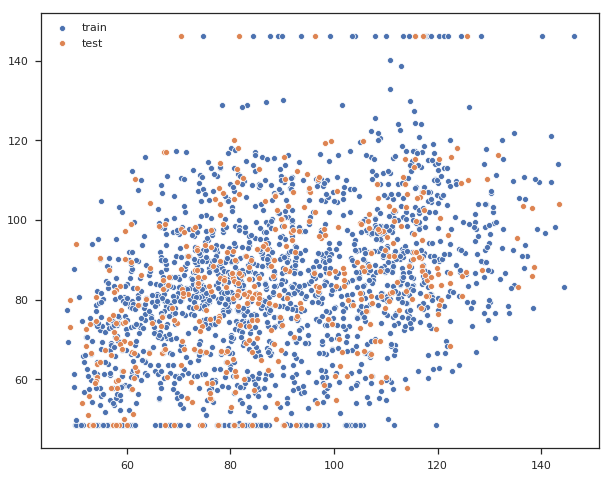

In [99]:
ransac = linear_model.RANSACRegressor()
ransac.fit(X_train, Y_train)
transac = linear_model.RANSACRegressor()
transac.fit(Xt_train, Yt_train) 
qransac = linear_model.RANSACRegressor()
qransac.fit(Xq_train, Yq_train)
evaluateClf(linear_model.RANSACRegressor, {})

**XGBoost**

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=256, n_jobs=1,
       nthread=4, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)
RMSE training set: 12.682502476854848
RMSE testing set: 14.654050639681977
MAE training set: 10.407412802964465
MAE testing set: 12.083628065440577


/home/agnieszka/.local/lib/python3.6/site-packages/matplotlib/legend.py:1364: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


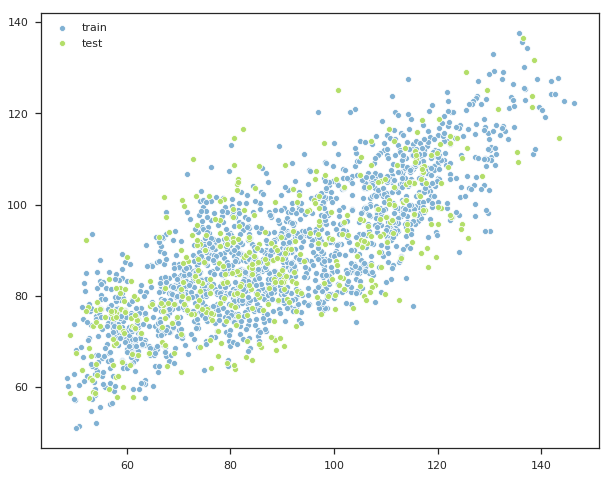

RMSE training set: 12.744253249861764
RMSE testing set: 14.62379466597674
MAE training set: 10.4549148841175
MAE testing set: 12.033886641141022


/home/agnieszka/.local/lib/python3.6/site-packages/matplotlib/legend.py:1364: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


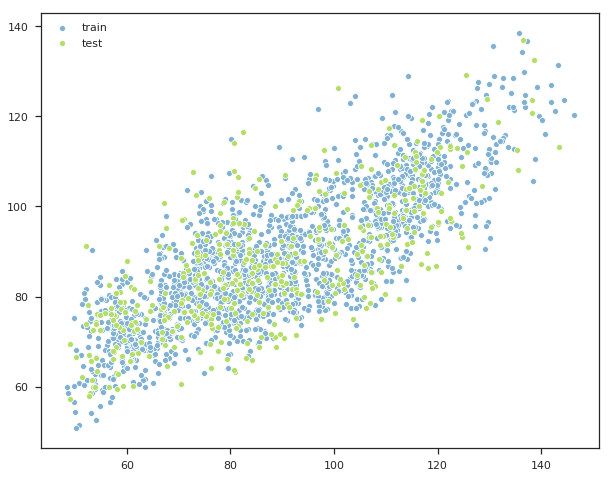

RMSE training set: 13.2032677332541
RMSE testing set: 14.859227669730439
MAE training set: 10.82826389631721
MAE testing set: 12.215322733762312


/home/agnieszka/.local/lib/python3.6/site-packages/matplotlib/legend.py:1364: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


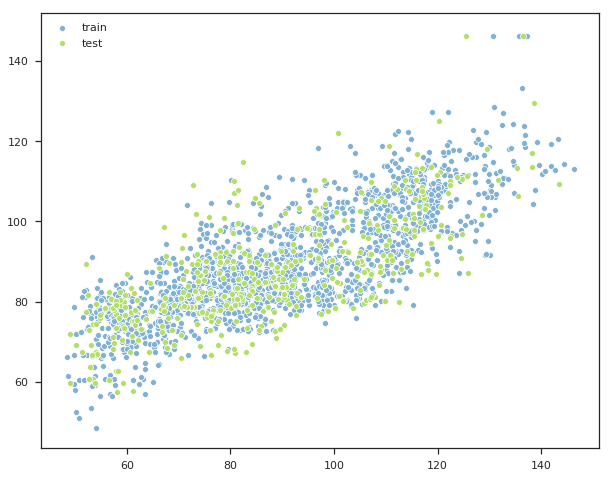

In [205]:
import xgboost as xgb

evaluateClf(xgb.XGBRegressor, { 'max_depth':2, 'n_estimators':256, 'learning_rate':0.10, 'nthread': 4} )

**Analiza głównych składowych - PCA**

In [163]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import scale
import scipy.spatial.distance as dist
from sklearn.manifold import MDS

In [164]:
pt_scaled = scale(pt)
qt_scaled = scale(qt)

pt_distance = dist.pdist(pt_scaled)
pt_distance = dist.squareform(pt_distance)
pt_punkty = MDS(n_components=2, dissimilarity='precomputed', random_state=1,eps=1e-5,n_init=10).fit_transform(pt_distance)

pca_pt = PCA(8,whiten=True).fit(pt_scaled)
pca_pt.explained_variance_ratio_
pt_components = pca_pt.transform(pt_scaled)

In [165]:
pca_pt.explained_variance_ratio_

array([0.22819307, 0.16116197, 0.10625754, 0.0769338 , 0.07123432,
       0.06738065, 0.05770351, 0.05273907])

In [ ]:
qt_distance = dist.pdist(qt_scaled)
qt_distance = dist.squareform(qt_distance)
qt_punkty = MDS(n_components=2, dissimilarity='precomputed', random_state=1,eps=1e-5,n_init=10).fit_transform(qt_distance)

pca_qt = PCA(4,whiten=True).fit(qt_scaled)
pca_qt.explained_variance_ratio_
qt_components = pca_qt.transform(qt_scaled)

In [ ]:
pca_qt.explained_variance_ratio_

        var   PC
0  0.228193  PC1
1  0.161162  PC2
2  0.106258  PC3
3  0.076934  PC4
4  0.071234  PC5
5  0.067381  PC6
6  0.057704  PC7
7  0.052739  PC8


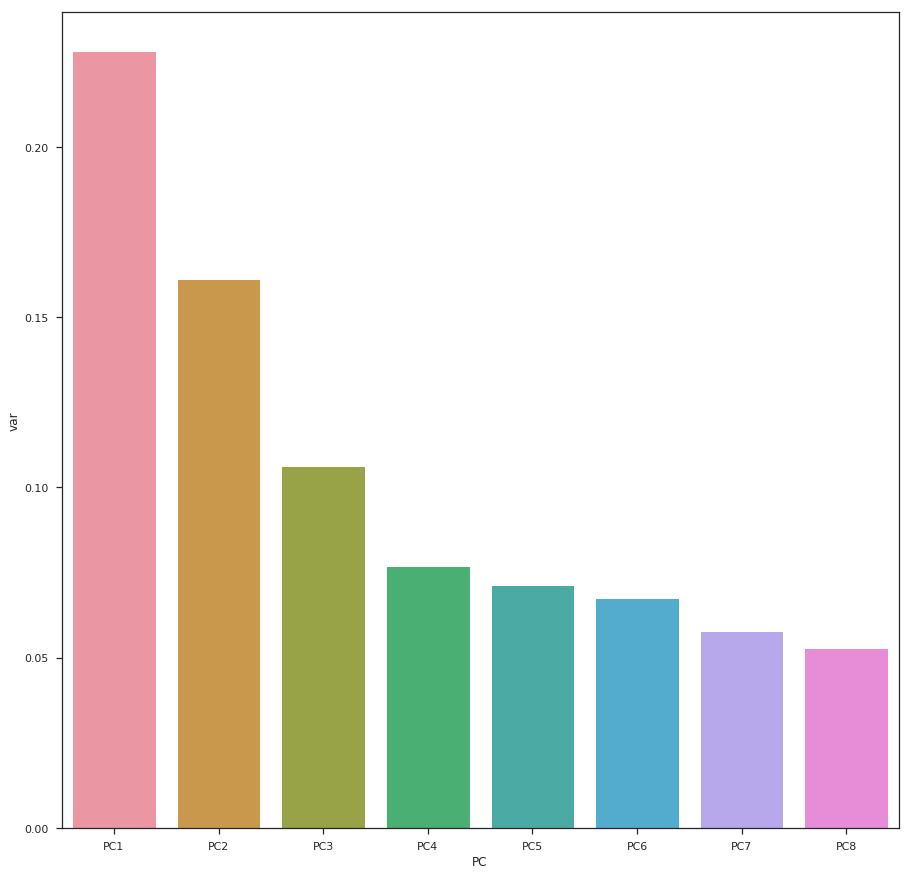

In [166]:
df_pca = pd.DataFrame({'var':pca_pt.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8']})
print(df_pca)
sns.barplot(x='PC',y="var", data=df_pca)

**Grupowanie**

In [55]:
pt_scaled = scale(pt)
qt_scaled = scale(qt)

In [103]:
pts_array = pt.values
Xpts = pts_array[:, (0,1,2,3,4,5,6,7,8,9,10,11,12,14)].astype(np.float)
Ypts = pts_array[:, waterlv_index].astype(np.float)

In [104]:
qts_array = qt.values
Xqts = qts_array[:, (0,1,2,3,4,5,6,7,8,9,10,11,12,14)].astype(np.float)
Yqts = qts_array[:, waterlv_index].astype(np.float)

In [105]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

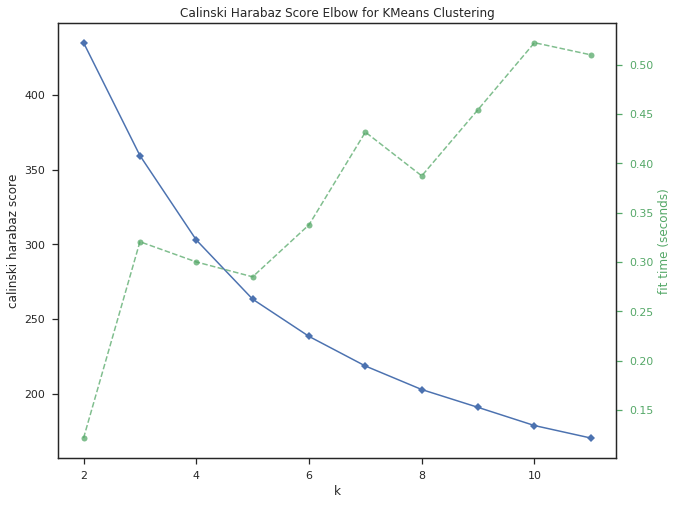

In [106]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12),  metric='calinski_harabaz', locate_elbow=True)

visualizer.fit(Xpts)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

In [107]:
from sklearn.cluster import MiniBatchKMeans
from yellowbrick.cluster import SilhouetteVisualizer

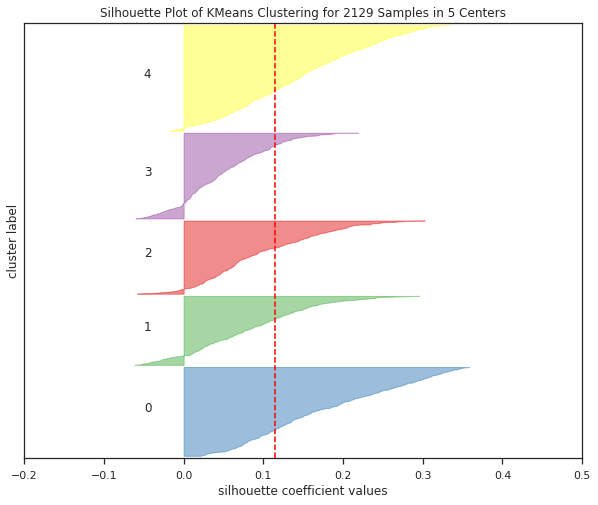

In [108]:
model = KMeans(5, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick', palette="Set3")

visualizer.fit(Xpts)        # Fit the data to the visualizer
visualizer.poof()

In [109]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(Xpts)

y_kmeans = kmeans.predict(Xpts)
y_kmeans

array([1, 1, 4, ..., 1, 1, 1], dtype=int32)

In [162]:
pd.set_option('display.max_columns', 500)
df_clust = df.copy()
df_clust['klasa'] = y_kmeans
grpb = df_clust.groupby('klasa').agg(['mean','std'])
grpb

cos             meantemp              precip             precip1  \
           mean       std       mean       std      mean       std      mean   
klasa                                                                          
0     -0.513759  0.487230   2.991568  3.593854  1.927838  3.318933  2.159631   
1     -0.361314  0.561385  13.220987  4.582266  1.369507  3.598581  0.333296   
2     -0.512624  0.496540  13.855155  3.945629  1.653631  4.216619  0.724643   
3     -0.357247  0.532742   0.965332  4.849408  0.655258  1.906498  0.458597   
4     -0.354853  0.452910  12.097438  5.047459  4.608939  6.854685  6.727162   

                  precip2             precip3             precip4            \
            std      mean       std      mean       std      mean       std   
klasa                                                                         
0      3.245157  2.695037  3.813715  2.823194  3.875859  3.105872  4.370371   
1      1.298501  0.305381  1.100438  0.230874  0.780742  0.169552  0.513666   
2      2.650270  3.115625  6.622425  4.908988  7.545115  5.701190  7.428039   
3      1.234925  0.454423  1.183296  0.446554  1.344365  0.449982  1.236081   
4      7.282883  4.074721  5.873799  2.404775  4.401044  1.457029  3.423188   

        precip5            precipsum                  sealv             \
           mean       std       mean        std        mean        std   
klasa                                                                    
0      2.930786  4.060466  13.714521  10.129093  518.064595  21.208947   
1      0.385022  1.203029   1.424126   2.085707  503.857803  12.391449   
2      4.540030  6.650753  18.990476  13.342105  510.010685  13.363497   
3      0.555737  1.489474   2.365293   2.688863  491.316767  14.968752   
4      2.275809  5.521188  16.939496  13.203024  515.749735  17.316398   

            sin                 temp               vwind            \
           mean       std       mean       std      mean       std   
klasa                                                                
0     -0.230603  0.668702   2.450025  3.943524  4.565356  2.180347   
1      0.109609  0.737707  13.836839  5.054455  4.060090  1.726114   
2      0.122275  0.691281  14.055685  4.510465  3.688482  1.394045   
3      0.146452  0.754073   1.219414  5.318280  4.345435  2.071370   
4     -0.644698  0.504515  11.359761  4.344291  6.507082  2.619025   

          waterlv             watertemp            
             mean        std       mean       std  
klasa                                              
0      101.407518  21.284343   8.706978  1.406437  
1       80.942265  18.891530  10.467758  1.629098  
2       86.687173  19.471165  11.124405  1.510782  
3       90.655879  21.207486   7.620835  1.009322  
4       86.320610  18.910213  10.856180  1.675094

(array([407.,   0., 446.,   0.,   0., 336.,   0., 563.,   0., 377.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

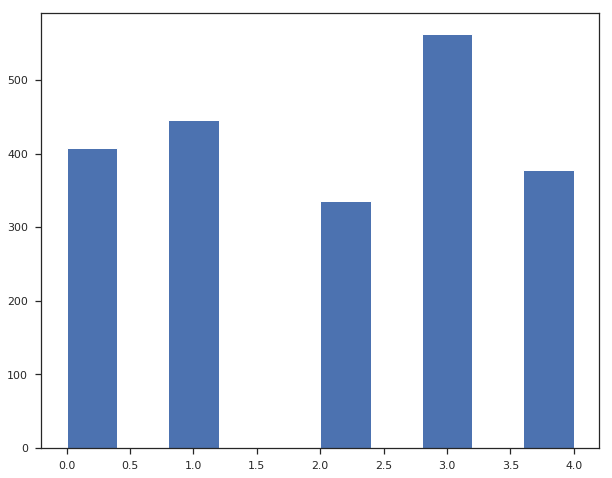

In [111]:
plt.hist(df_clust.klasa)

list

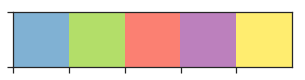

In [148]:
current_palette1 = sns.color_palette('Set3')
first = current_palette1[4]
second = current_palette1[6]
third = current_palette1[3]
fourth = current_palette1[9]
fifth = current_palette1[11]
current_palette = [first, second, third, fourth, fifth]
sns.set_palette(current_palette)

sns.palplot(current_palette)
type(current_palette)

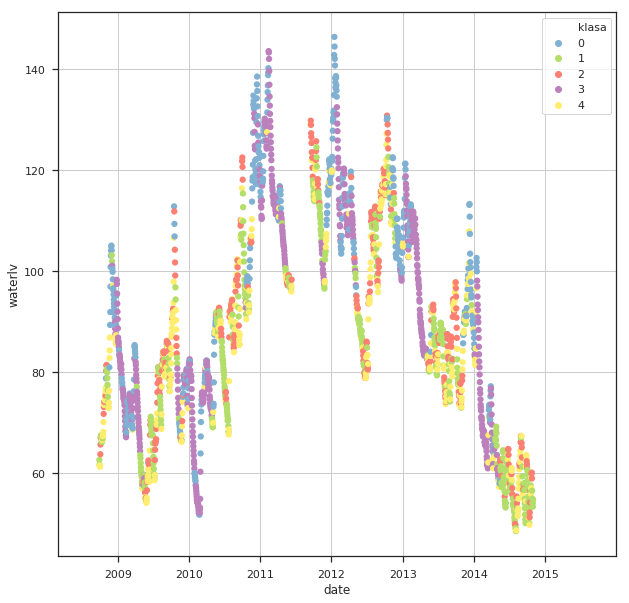

In [171]:
# import seaborn as sns

fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [10,8]
sns.scatterplot(df_clust.index, df_clust.waterlv, hue=df_clust.klasa, 
                edgecolor="none", palette=current_palette, s=40, legend="full",)

ax.legend(frameon=True)

ax.set(xlim=('2008-03-01','2015-12-31'))
ax.grid(True)
ax.set_ylabel('waterlv')
ax.set_xlabel('date')

plt.show()

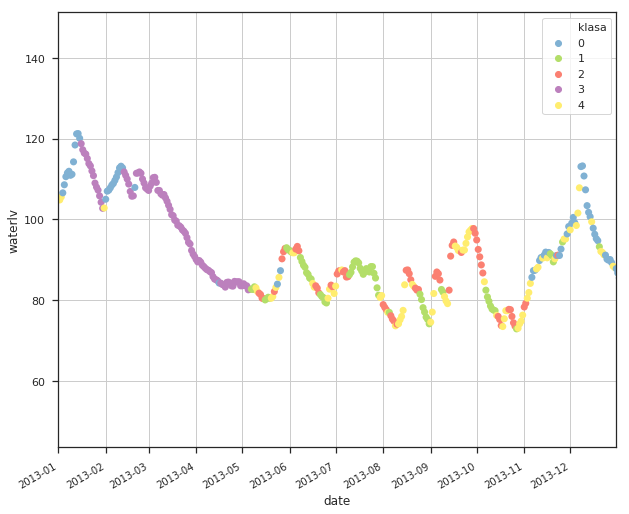

In [289]:
fig, ax = plt.subplots()

sns.scatterplot(df_clust.index, df_clust.waterlv, hue=df_clust.klasa, 
                edgecolor="none", palette=current_palette, s = 50 )
ax.legend(frameon=True)
ax.set(xlim=('2013-01-01','2013-12-31'))
ax.grid(True)
ax.set_ylabel('waterlv')
ax.set_xlabel('date')
plt.xticks(
    rotation=30, 
    horizontalalignment='right', 
    fontsize='small'
)

plt.show()

AttributeError: 'DataFrame' object has no attribute 'clust'

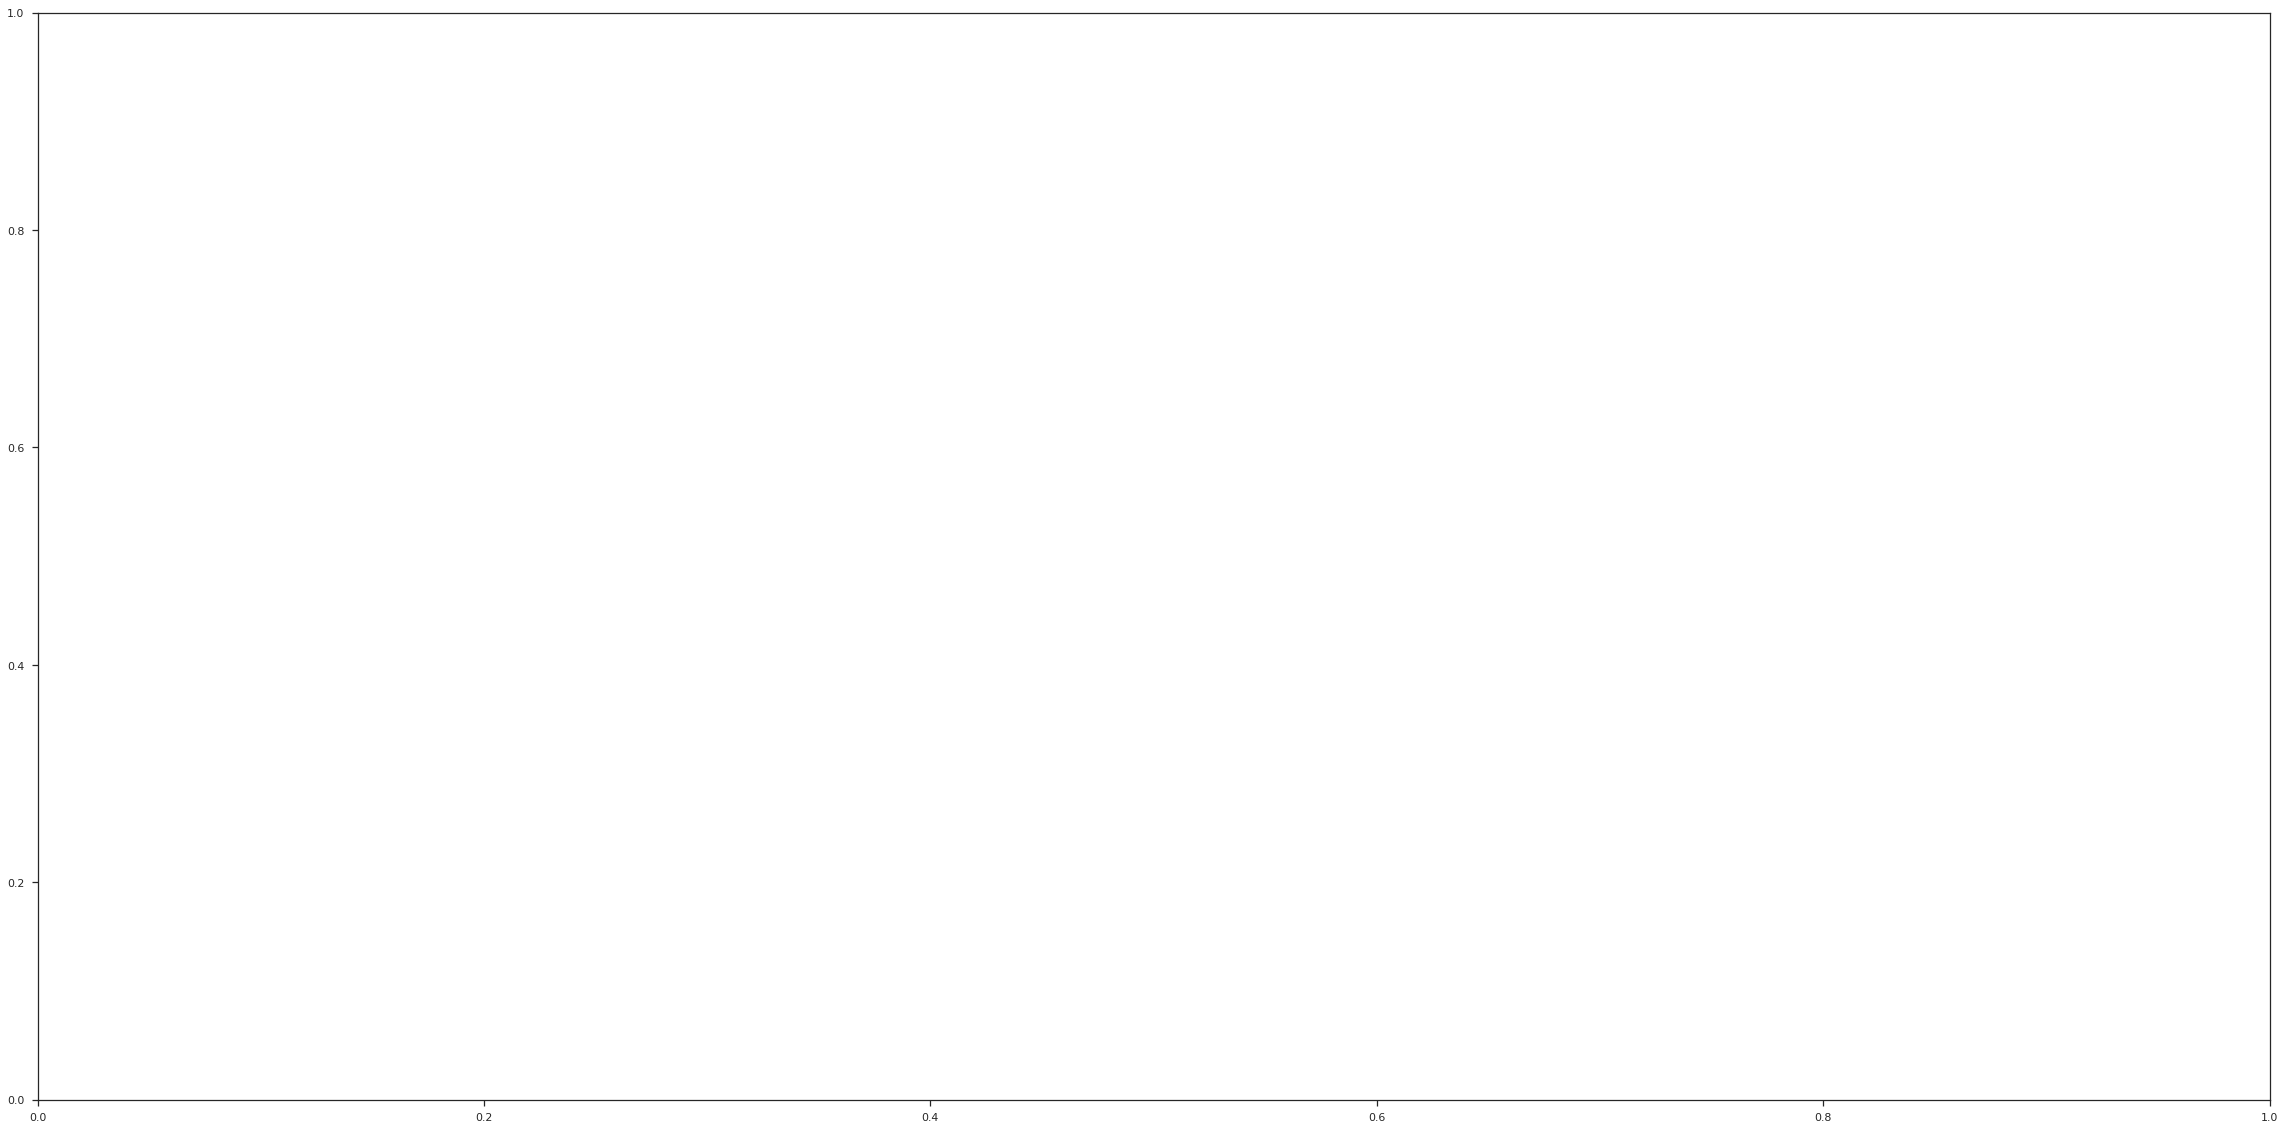

In [157]:
fig, axes = plt.subplots()
plt.rcParams['figure.figsize'] = [15,15]
plt.scatter(df_clust.index, df_clust.waterlv, c=df_clust.clust, s = 200)
axes.set_ylabel('waterlv')
axes.set_xlabel('date')
axes.legend()
plt.show()


In [ ]:
Xpts[:, 0]

**Grid Search**
**Random Forest**

In [167]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = {'n_estimators': [10, 50, 100, 200], 'max_depth': [5, 10, 20, 30], 'min_samples_split': [0.1,0.3,0.6],
                   'min_samples_leaf': [1,2,4]}

model = RandomForestRegressor(random_state=1)

grids= GridSearchCV(model ,tuned_parameters,cv=5,scoring='neg_mean_absolute_error',n_jobs=12)
grids.fit(X_train,Y_train)
grids.best_params_

KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
evaluateClf(RandomForestRegressor, { 'n_estimators':10, 'max_depth': 10, 'random_state': 0,
                                   'min_samples_leaf': 1, 'min_samples_split':0.1})

In [ ]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = {'n_estimators': [8, 10,12], 'max_depth': [8, 10, 12], 'min_samples_split': [0.05, 0.1,0.15]}

model = RandomForestRegressor(random_state=1)

grids= GridSearchCV(model ,tuned_parameters,cv=5,scoring='neg_mean_absolute_error',n_jobs=12)
grids.fit(X_train,Y_train)
grids.best_params_

In [ ]:
from sklearn.ensemble import RandomForestRegressor
evaluateClf(RandomForestRegressor, { 'n_estimators':10, 'max_depth': 12, 'random_state': 1, 'min_samples_split': 0.05, 'min_samples_leaf': 1})

In [ ]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = {'n_estimators': [10, 50, 100, 200], 'max_depth': [5, 10, 20, 30]}

model = RandomForestRegressor(random_state=1)

grids= GridSearchCV(model ,tuned_parameters,cv=5,scoring='neg_mean_absolute_error',n_jobs=12)
grids.fit(X_train,Y_train)
grids.best_params_

In [ ]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = {'n_estimators': [180, 200, 220], 'max_depth': [18, 20, 22]}

model = RandomForestRegressor(random_state=1)

grids= GridSearchCV(model ,tuned_parameters,cv=5,scoring='neg_mean_absolute_error',n_jobs=12)
grids.fit(X_train,Y_train)
grids.best_params_

In [ ]:
from sklearn.ensemble import RandomForestRegressor
evaluateClf(RandomForestRegressor, { 'n_estimators':200, 'max_depth': 20, 'random_state': 1})

**Grid Search**
**XGboost**

In [ ]:
tuned_parameters = {'n_estimators': [10, 100, 200, 300], 'max_depth': [3, 5, 10], 'learning_rate': [0.01, 0.05, 0.07, 0.1], 'objective':['reg:linear'], 'min_child_weight': [1, 2]}

model = xgb.XGBRegressor()

grids= GridSearchCV(model ,tuned_parameters,cv=5,scoring='neg_mean_absolute_error',n_jobs=12)
grids.fit(X_train,Y_train)
grids.best_params_

In [ ]:
evaluateClf(xgb.XGBRegressor, {'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.05, 'min_child_weight': 2,
                              'objective': 'reg:linear'}  )

In [ ]:
tuned_parameters = {'n_estimators': [275,300, 325], 'max_depth': [8, 10, 12], 'learning_rate': [0.04, 0.05, 0.06], 'objective':['reg:linear'], 'min_child_weight': [2, 3]}

model = xgb.XGBRegressor()

grids= GridSearchCV(model ,tuned_parameters,cv=5,scoring='neg_mean_absolute_error',n_jobs=12)
grids.fit(X_train,Y_train)
grids.best_params_

In [ ]:
evaluateClf(xgb.XGBRegressor, {'n_estimators': 325, 'max_depth': 10, 'learning_rate': 0.04, 'min_child_weight': 3,
                              'objective': 'reg:linear'}  )

Residuals

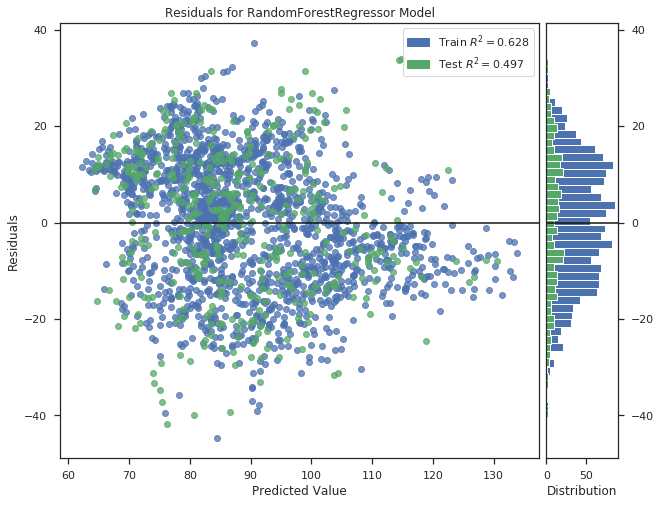

In [207]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
modelRF = RandomForestRegressor(n_estimators=200, max_depth= 6, random_state=1)
visualizer = ResidualsPlot(modelRF)

visualizer.fit(X_train, Y_train)  # Fit the training data to the visualizer
visualizer.score(X_validation, Y_validation)  # Evaluate the model on the test data
visualizer.poof() 

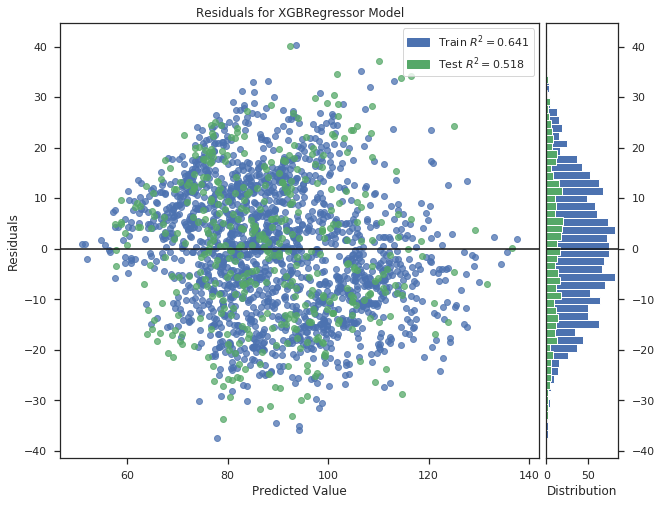

In [115]:
modelXGB = xgb.XGBRegressor(n_estimators =256, max_depth= 2, learning_rate= 0.1, nthread = 4)
visualizer = ResidualsPlot(modelXGB)

visualizer.fit(X_train, Y_train)  # Fit the training data to the visualizer
visualizer.score(X_validation, Y_validation)  # Evaluate the model on the test data
visualizer.poof()    

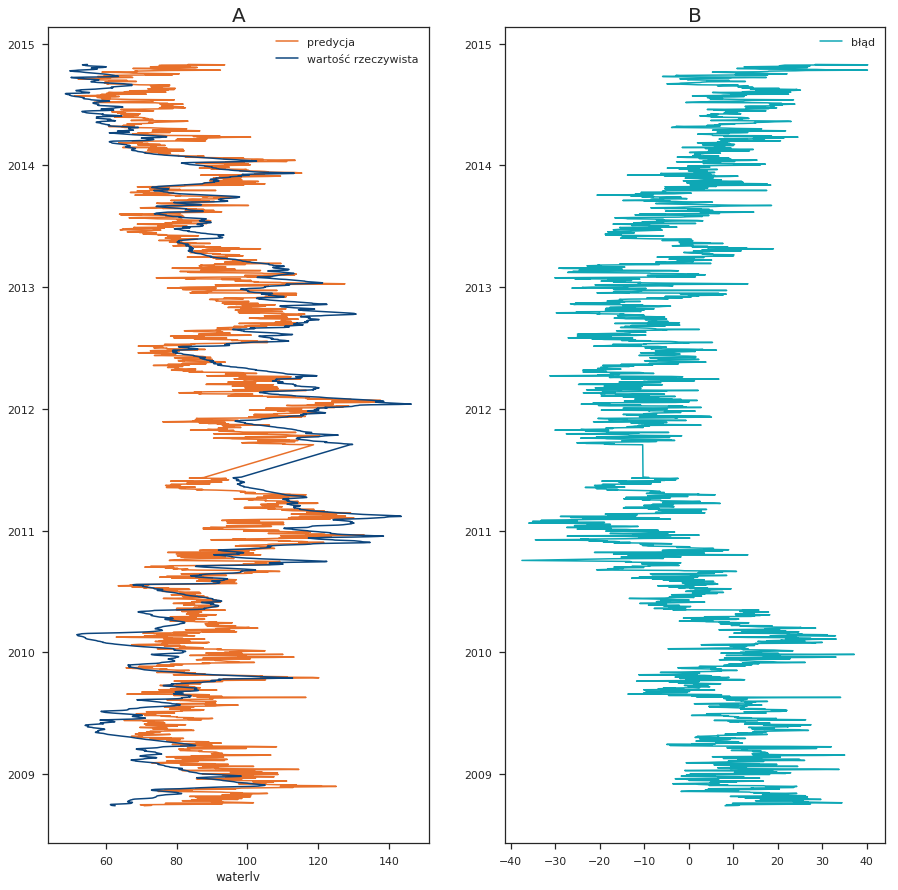

In [116]:
modelXGB.fit(X_train, Y_train)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,15))
xgb_pred = modelXGB.predict(X)
xgb_err = xgb_pred - df.waterlv
ax1.plot(xgb_pred, df.index, color = '#e8702a', label = 'predycja')
ax2.plot(xgb_err, df.index, color='#0ea7b5', label = 'błąd')
df.reset_index().plot(x='waterlv', y='date', color = '#0c457d', ax=ax1, label = 'wartość rzeczywista')
ax1.legend()
ax2.legend()
ax1.set_title('A', fontsize=20)
ax2.set_title('B', fontsize=20)
plt.show()


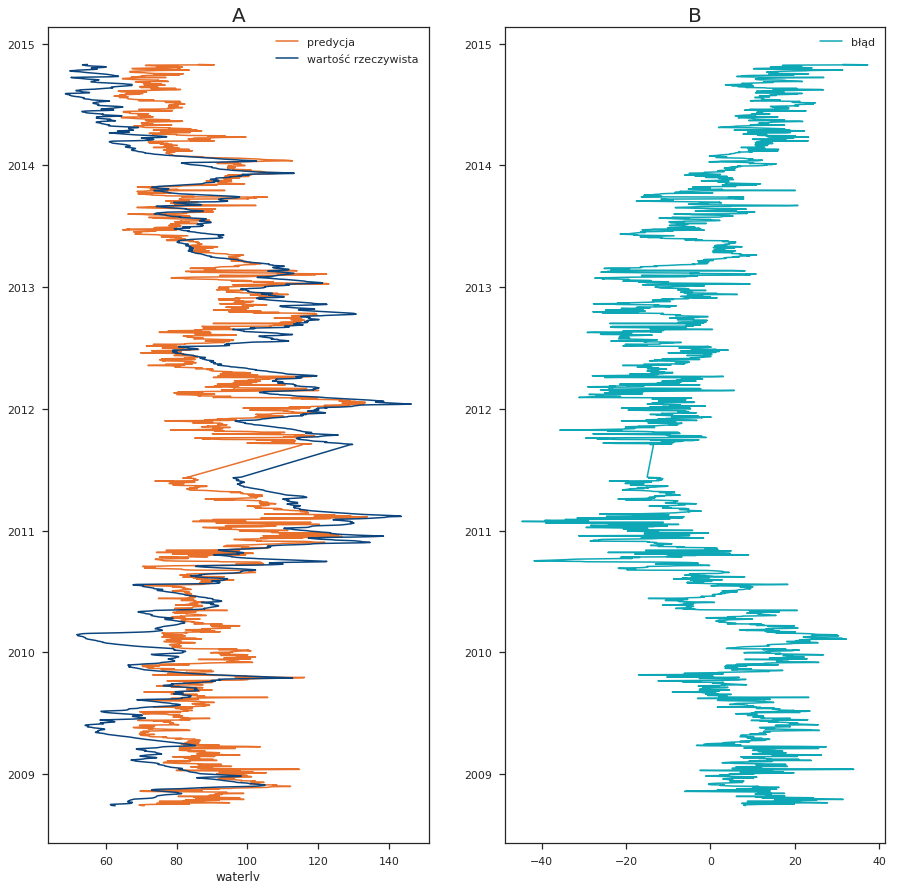

In [117]:
modelRF.fit(X_train, Y_train)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,15))
rf_pred = modelRF.predict(X)
rf_err = rf_pred - df.waterlv
ax1.plot(rf_pred, df.index, color = '#e8702a', label = 'predycja')
ax2.plot(rf_err, df.index, color='#0ea7b5', label = 'błąd')
df.reset_index().plot(x='waterlv', y='date', color = '#0c457d', ax=ax1, label = 'wartość rzeczywista')
ax1.legend()
ax2.legend()
ax1.set_title('A', fontsize=20)
ax2.set_title('B', fontsize=20)
plt.show()


In [297]:
rf_importances = modelRF.feature_importances_

In [248]:
imp = list(zip(rf_importances, colnames))
imp.sort()

In [255]:
xgb_importances = modelXGB.feature_importances_
xgb_importances

array([0.0397501 , 0.1167717 , 0.06716121, 0.09095513, 0.03049254,
       0.02721174, 0.04819995, 0.05585731, 0.06091319, 0.22713539,
       0.02571912, 0.10049516, 0.02890628, 0.08043119], dtype=float32)

In [256]:
impx = list(zip(xgb_importances, colnames))
impx.sort()

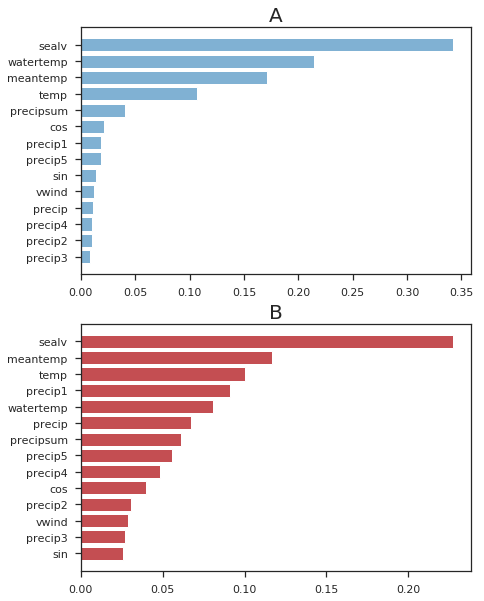

In [283]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(7,10))
ax1.barh([i[1] for i in imp], [i[0] for i in imp])
ax2.barh([i[1] for i in impx], [i[0] for i in impx], color = 'r')
ax1.set_title('A', fontsize=20)
ax2.set_title('B', fontsize=20)
plt.show()



In [291]:
clust_error = df_clust.copy()
rf_pred = modelRF.predict(X)
rf_err = rf_pred - df.waterlv
xgb_pred = modelXGB.predict(X)
xgb_err = xgb_pred - df.waterlv
clust_error['rf_err'] = rf_err
clust_error['xgb_err'] = xgb_err
grpb_err = clust_error.groupby('klasa').agg(['mean','std'])
grpb_err

cos             meantemp              precip             precip1  \
           mean       std       mean       std      mean       std      mean   
klasa                                                                          
0     -0.513759  0.487230   2.991568  3.593854  1.927838  3.318933  2.159631   
1     -0.361314  0.561385  13.220987  4.582266  1.369507  3.598581  0.333296   
2     -0.512624  0.496540  13.855155  3.945629  1.653631  4.216619  0.724643   
3     -0.357247  0.532742   0.965332  4.849408  0.655258  1.906498  0.458597   
4     -0.354853  0.452910  12.097438  5.047459  4.608939  6.854685  6.727162   

                  precip2             precip3             precip4            \
            std      mean       std      mean       std      mean       std   
klasa                                                                         
0      3.245157  2.695037  3.813715  2.823194  3.875859  3.105872  4.370371   
1      1.298501  0.305381  1.100438  0.230874  0.780742  0.169552  0.513666   
2      2.650270  3.115625  6.622425  4.908988  7.545115  5.701190  7.428039   
3      1.234925  0.454423  1.183296  0.446554  1.344365  0.449982  1.236081   
4      7.282883  4.074721  5.873799  2.404775  4.401044  1.457029  3.423188   

        precip5            precipsum                  sealv             \
           mean       std       mean        std        mean        std   
klasa                                                                    
0      2.930786  4.060466  13.714521  10.129093  518.064595  21.208947   
1      0.385022  1.203029   1.424126   2.085707  503.857803  12.391449   
2      4.540030  6.650753  18.990476  13.342105  510.010685  13.363497   
3      0.555737  1.489474   2.365293   2.688863  491.316767  14.968752   
4      2.275809  5.521188  16.939496  13.203024  515.749735  17.316398   

            sin                 temp               vwind            \
           mean       std       mean       std      mean       std   
klasa                                                                
0     -0.230603  0.668702   2.450025  3.943524  4.565356  2.180347   
1      0.109609  0.737707  13.836839  5.054455  4.060090  1.726114   
2      0.122275  0.691281  14.055685  4.510465  3.688482  1.394045   
3      0.146452  0.754073   1.219414  5.318280  4.345435  2.071370   
4     -0.644698  0.504515  11.359761  4.344291  6.507082  2.619025   

          waterlv             watertemp              rf_err             \
             mean        std       mean       std      mean        std   
klasa                                                                    
0      101.407518  21.284343   8.706978  1.406437 -0.949573  12.690413   
1       80.942265  18.891530  10.467758  1.629098 -0.354367  13.412567   
2       86.687173  19.471165  11.124405  1.510782 -0.921942  13.175174   
3       90.655879  21.207486   7.620835  1.009322  0.211555  14.689234   
4       86.320610  18.910213  10.856180  1.675094  1.283024  11.889734   

        xgb_err             
           mean        std  
klasa                       
0     -0.468682  13.776533  
1     -0.372740  12.176756  
2     -0.156298  13.150953  
3      0.380010  13.737609  
4      0.774085  12.408900

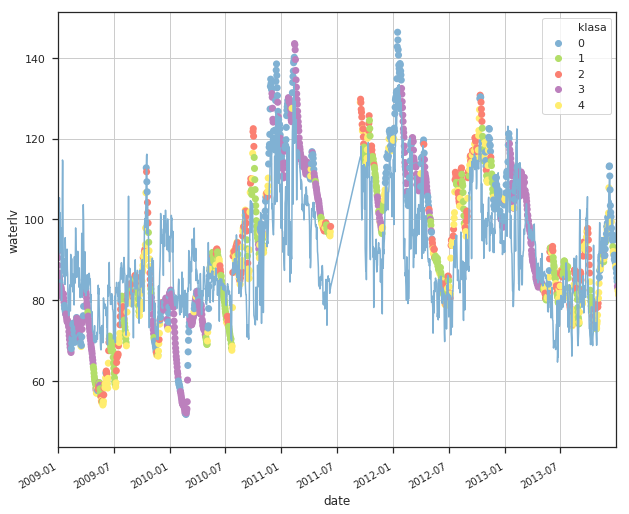

In [296]:
fig, ax = plt.subplots()

sns.scatterplot(df_clust.index, df_clust.waterlv, hue=df_clust.klasa, 
                edgecolor="none", palette=current_palette, s = 50 )
ax.plot(df_clust.index, rf_pred)
ax.legend(frameon=True)
ax.set(xlim=('2009-01-01','2013-12-31'))
ax.grid(True)
ax.set_ylabel('waterlv')
ax.set_xlabel('date')
plt.xticks(
    rotation=30, 
    horizontalalignment='right', 
    fontsize='small'
)

plt.show()

/home/agnieszka/.local/lib/python3.6/site-packages/matplotlib/legend.py:1364: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


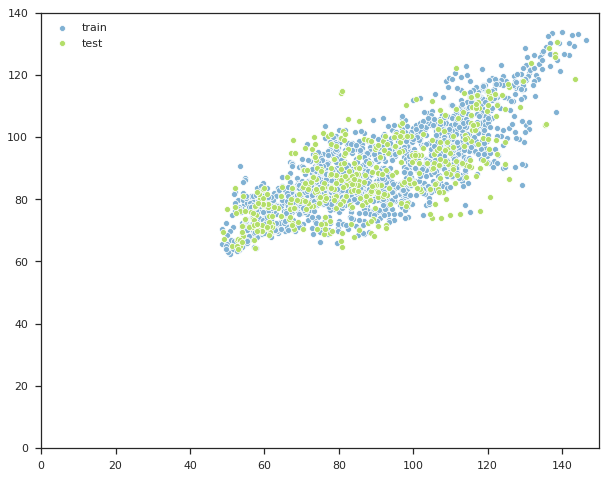

In [306]:
fig, ax = plt.subplots()
train = Y_train
train_pred = modelRF.predict(X_train)
test = Y_validation
test_pred = modelRF.predict(X_validation)

lbls = ['train', 'test']
trainplot = sns.scatterplot(train,train_pred,ax=ax)
testplot = sns.scatterplot(test,test_pred)
plt.xlim([0, 150])
plt.ylim([0, 140])
plt.legend((trainplot, testplot), labels =lbls, loc='upper left')
plt.show()